<a href="https://colab.research.google.com/github/Rian021102/ISP-Churn-Analysis/blob/main/ISP_Churn_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [ ]:
url_df = 'https://drive.google.com/file/d/1F58GHnKom7Dd3NNTYkrJP6qATK8SvYZ9/view?usp=share_link'
path_df = 'https://drive.google.com/uc?export=download&id='+url_df.split('/')[-2]
df = pd.read_csv(path_df)

In [ ]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [ ]:
df.tail()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1
72273,1689744,1,1,0.01,0,0.82,0,0.0,0.0,0,1


In [ ]:
df.shape

(72274, 11)

# Data Cleaning

## Handling Typos

In [ ]:
df.rename(columns = {'reamining_contract':'remaining_contract'}, inplace = True)

There is Typo in one of the column called reamining contract. It's supposed to be remining contract

## Handling Duplicated Values

No duplicated values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df[['id']].duplicated()]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn


In [ ]:
df['id'].unique().tolist()

[15,
 18,
 23,
 27,
 34,
 56,
 71,
 84,
 94,
 112,
 166,
 174,
 213,
 222,
 270,
 288,
 291,
 417,
 475,
 507,
 530,
 549,
 550,
 600,
 608,
 617,
 642,
 644,
 680,
 682,
 683,
 696,
 730,
 734,
 774,
 790,
 831,
 848,
 861,
 905,
 921,
 928,
 933,
 945,
 977,
 999,
 1006,
 1038,
 1048,
 1051,
 1061,
 1075,
 1151,
 1162,
 1169,
 1201,
 1206,
 1226,
 1266,
 1281,
 1296,
 1311,
 1327,
 1413,
 1414,
 1416,
 1455,
 1457,
 1492,
 1517,
 1522,
 1568,
 1662,
 1664,
 1684,
 1693,
 1694,
 1709,
 1717,
 1733,
 1744,
 1746,
 1778,
 1783,
 1793,
 1805,
 1810,
 1844,
 1878,
 1893,
 1901,
 1915,
 1917,
 1934,
 1947,
 1950,
 1965,
 1966,
 1975,
 1977,
 2005,
 2008,
 2017,
 2047,
 2097,
 2110,
 2116,
 2122,
 2135,
 2142,
 2202,
 2203,
 2238,
 2248,
 2252,
 2290,
 2334,
 2371,
 2416,
 2499,
 2538,
 2567,
 2581,
 2587,
 2684,
 2705,
 2733,
 2760,
 2781,
 2790,
 2796,
 2839,
 2852,
 2858,
 2882,
 2903,
 2926,
 2943,
 2945,
 2997,
 3017,
 3033,
 3061,
 3086,
 3121,
 3133,
 3175,
 3191,
 3196,
 3199,
 3210

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   remaining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


## Convert id from Integer to Object/String

In [ ]:
df['id']=df['id'].apply(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  object 
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   remaining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 6.1+ MB


## Handling Missing Values

In [ ]:
df.isna().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [ ]:
df01=df.copy()

For the remining contract, if is not in contract than the values should be zero(0) or null. Hence for NaN values in remining contract we should fill with zero (no contract)

In [ ]:
df01['remaining_contract'] = df01['remaining_contract'].fillna(0)


In [ ]:
df01.isna().sum()

id                               0
is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
remaining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

Both download and upload average have 381 missing values. Since we cannot simply just fill the NaN with zeros, we can simply drop the NaN.

In [ ]:
df01.shape

(72274, 11)

In [ ]:
df01.dropna(axis=0,inplace=True)


In [ ]:
df01.shape

(71893, 11)

### Descriptive Statistic

In [ ]:
df01.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000
mean,0.815225,0.334066,2.455486,19.016844,0.497612,0.275674,43.689911,4.192076,0.208713,0.557078
std,0.388117,0.471666,2.026856,13.188541,0.665755,0.818533,63.405963,9.818896,0.999647,0.496735
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.940000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.000000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.000000,1.000000,3.300000,22.000000,1.030000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


# Adding More Variables?

We'd like to see how the impact of adding values, in identifying outliers

In [ ]:
df02=df01.copy()

## Adding Total Quota

In [ ]:
df02['total_quota']=df02['download_avg']+df02['upload_avg']

In [ ]:
df02

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1,0.0
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1,0.0
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1,0.0


## Adding is on Contract?

In [ ]:
df02.describe(include='all')

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota
count,71893,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000,71893.000000
unique,71893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.815225,0.334066,2.455486,19.016844,0.497612,0.275674,43.689911,4.192076,0.208713,0.557078,47.881987
std,NaN,0.388117,0.471666,2.026856,13.188541,0.665755,0.818533,63.405963,9.818896,0.999647,0.496735,69.333141
min,NaN,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,0.940000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000,7.400000
50%,NaN,1.000000,0.000000,1.980000,19.000000,0.000000,0.000000,27.800000,2.100000,0.000000,1.000000,30.400000
75%,NaN,1.000000,1.000000,3.300000,22.000000,1.030000,0.000000,60.500000,4.800000,0.000000,1.000000,66.000000


In [ ]:
df02['is_on_contract']=df02['remaining_contract'].apply(lambda x: 'yes' if x>0 else 'no')

In [ ]:
df02

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,yes
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1,0.0,no
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,no
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1,0.0,no
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0,yes
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8,yes
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7,yes
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1,0.0,yes


## Adding is Overlimit?

In [ ]:
df02['download_over_limit'].unique().tolist()

[0, 3, 7, 2, 5, 1, 6, 4]

In [ ]:
df02['is_over_limit']=df02['download_over_limit'].apply(lambda x: 'yes' if x>0 else 'no')

## Adding is internet subsricber column

In [ ]:
df02['is_internet_subscriber']=df02['total_quota'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
df02.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,yes,no,1
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1,0.0,no,no,0
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,no,no,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1,0.0,no,no,0
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1,0.0,no,no,0


In [ ]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  object 
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  int64  
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  int64  
 11  total_quota                  71893 non-null  float64
 12  is_on_contract               71893 non-null  object 
 13  is_over_limit   

## Adding Customer Type Based on Their Subscribtions

In [ ]:
def customer_type (df02):    
    if (df02['is_tv_subscriber'] >0) & (df02['is_movie_package_subscriber']>0) & (df02['is_internet_subscriber']>0):
        return 'Platinum User'
    elif (df02['is_tv_subscriber'] >0) & (df02['is_movie_package_subscriber']>0) & (df02['is_internet_subscriber']==0):
        return 'Enjoying Watching'
    elif (df02['is_tv_subscriber'] >0) & (df02['is_movie_package_subscriber']==0) & (df02['is_internet_subscriber']==0):
        return 'Enjoying Watching'
    elif (df02['is_tv_subscriber'] ==0) & (df02['is_movie_package_subscriber']>0) & (df02['is_internet_subscriber']==0):
        return 'Enjoying Watching'
    elif (df02['is_tv_subscriber'] >0) & (df02['is_movie_package_subscriber']==0) & (df02['is_internet_subscriber']>0):
        return 'Internet & Watching'
    elif (df02['is_tv_subscriber'] ==0) & (df02['is_movie_package_subscriber']>0) & (df02['is_internet_subscriber']>0):
        return 'Internet & Watching'
    elif (df02['is_tv_subscriber'] ==0) & (df02['is_movie_package_subscriber']==0) & (df02['is_internet_subscriber']>0):
        return 'Surfer Dude'
    else:
        return "others"


In [ ]:
df02['customer_cat'] = df02.apply(customer_type, axis = 1)

In [ ]:
df02

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,yes,no,1,Internet & Watching
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1,0.0,no,no,0,others
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,no,no,1,Internet & Watching
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1,0.0,no,no,0,others
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1,0.0,no,no,0,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8,yes,no,1,Internet & Watching
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7,yes,no,1,Internet & Watching
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1,0.0,yes,no,0,others


In [ ]:
df02.isna().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
total_quota                    0
is_on_contract                 0
is_over_limit                  0
is_internet_subscriber         0
customer_cat                   0
dtype: int64

# Deep Cleaning


## Removing Values that don't make sense

Find subscriber who subscribe either tv or movie package, above 3 month subscribtion age, but billing is zero

In [ ]:
df02filter=df02[((df02['is_tv_subscriber'] == 0) & (df02['is_movie_package_subscriber'] ==0)&(df02['is_internet_subscriber']==0))] 

In [ ]:
df02filter

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1,0.0,no,no,0,others
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1,0.0,no,no,0,others
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1,0.0,no,no,0,others
7,84,0,0,5.48,14,0.00,1,0.0,0.0,0,1,0.0,no,no,0,others
8,94,0,0,8.54,0,0.00,0,0.0,0.0,0,1,0.0,no,no,0,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72241,1689178,0,0,0.01,1,1.62,0,0.0,0.0,0,1,0.0,yes,no,0,others
72248,1689245,0,0,0.00,0,0.08,0,0.0,0.0,0,1,0.0,yes,no,0,others
72262,1689476,0,0,0.00,1,0.61,0,0.0,0.0,0,1,0.0,yes,no,0,others
72264,1689533,0,0,0.01,0,0.00,0,0.0,0.0,0,1,0.0,no,no,0,others


In [ ]:
df02cf=df02[~((df02['is_tv_subscriber'] == 0) & (df02['is_movie_package_subscriber'] ==0)&(df02['is_internet_subscriber']==0))] 

In [ ]:
df02cf

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,yes,no,1,Internet & Watching
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,no,no,1,Internet & Watching
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0,73.4,yes,no,1,Platinum User
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,23.3,no,no,1,Surfer Dude
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,1,11.0,no,no,1,Platinum User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8,yes,no,1,Internet & Watching
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7,yes,no,1,Internet & Watching


## Handling Outliers

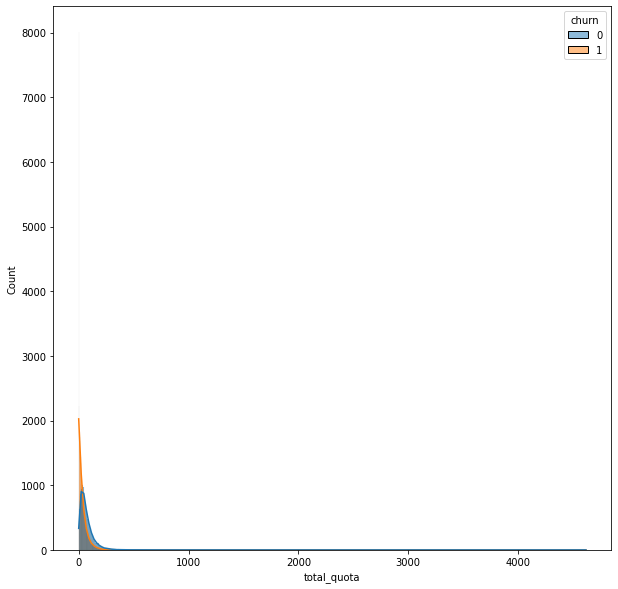

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'total_quota', hue = 'churn', data = df02cf ,     kde=True )

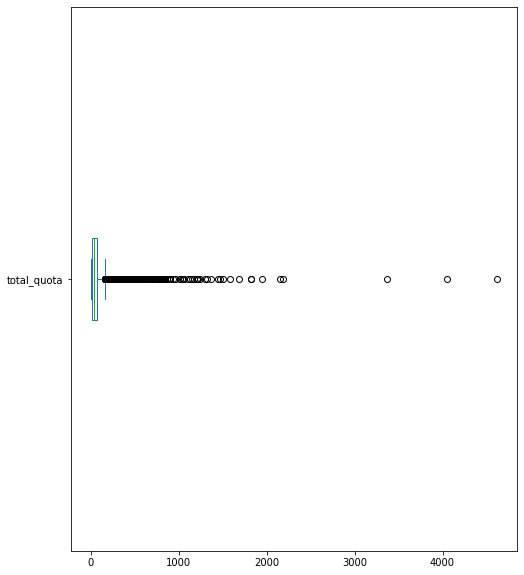

In [ ]:
df02cf['total_quota'].plot(kind='box',vert=False, figsize=(8,10))


In [ ]:
# Hitung kuartil 1 dan 3
Q1 = df02cf['total_quota'].quantile(0.25)
Q3 = df02cf['total_quota'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 11.9

Q3:
 70.0

IQR:
 58.1

Min:
 -75.25

Max:
 157.15


In [ ]:
df02cf.shape

(66694, 16)

In [ ]:
filter_min = df02cf['total_quota']<boxplot_min
filter_max = df02cf['total_quota']>boxplot_max

df_non_outlier = df02cf[~(filter_min|filter_max)]

df_non_outlier

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,yes,no,1,Internet & Watching
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,no,no,1,Internet & Watching
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0,73.4,yes,no,1,Platinum User
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,23.3,no,no,1,Surfer Dude
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,1,11.0,no,no,1,Platinum User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8,yes,no,1,Internet & Watching
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7,yes,no,1,Internet & Watching


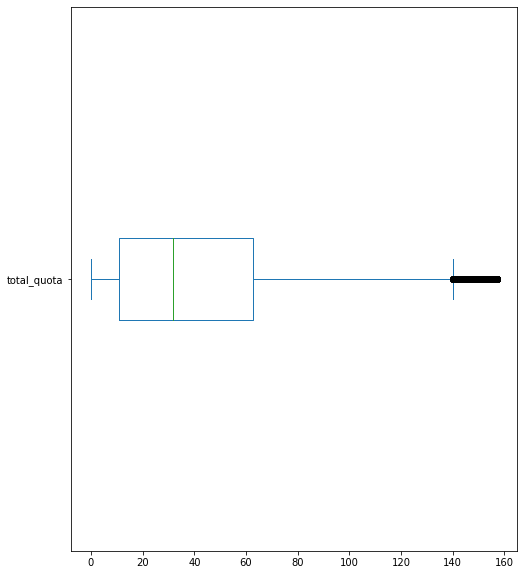

In [ ]:
df_non_outlier['total_quota'].plot(kind='box',vert=False, figsize=(8,10))


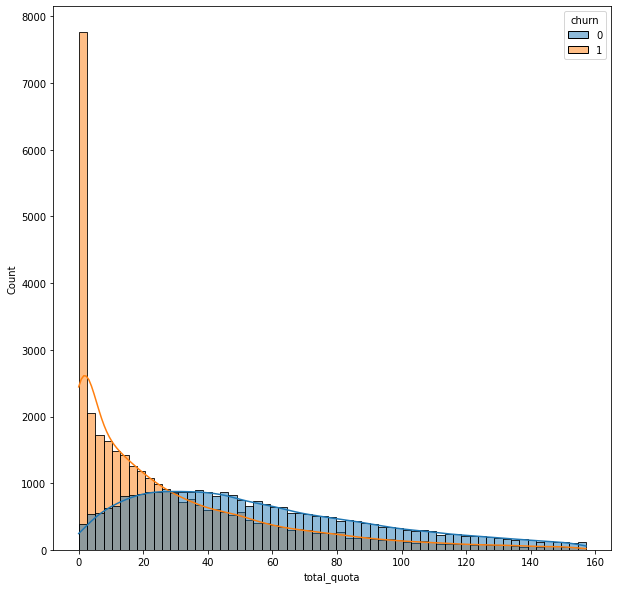

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'total_quota', hue = 'churn', data = df_non_outlier ,     kde=True )

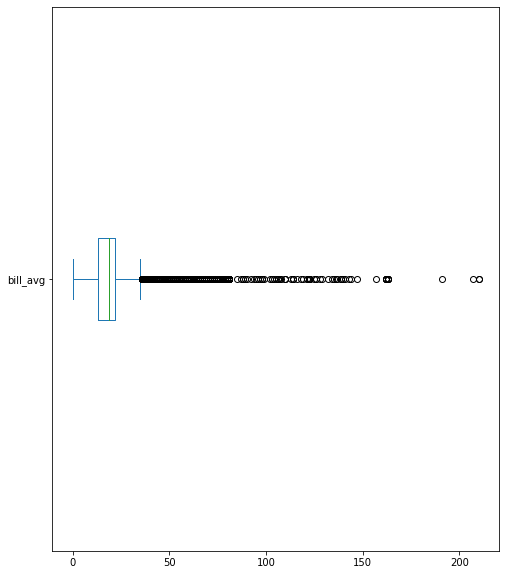

In [ ]:
df_non_outlier['bill_avg'].plot(kind='box',vert=False, figsize=(8,10))


In [ ]:
# Hitung kuartil 1 dan 3
Q1 = df_non_outlier['bill_avg'].quantile(0.25)
Q3 = df_non_outlier['bill_avg'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 13.0

Q3:
 22.0

IQR:
 9.0

Min:
 -0.5

Max:
 35.5


In [ ]:
df_non_outlier.shape

(63348, 16)

In [ ]:
filter_min = df_non_outlier['bill_avg']<boxplot_min
filter_max = df_non_outlier['bill_avg']>boxplot_max

df_non_outlier_02 = df_non_outlier[~(filter_min|filter_max)]

df_non_outlier_02

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,yes,no,1,Internet & Watching
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,no,no,1,Internet & Watching
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0,73.4,yes,no,1,Platinum User
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,23.3,no,no,1,Surfer Dude
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,1,11.0,no,no,1,Platinum User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8,yes,no,1,Internet & Watching
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7,yes,no,1,Internet & Watching


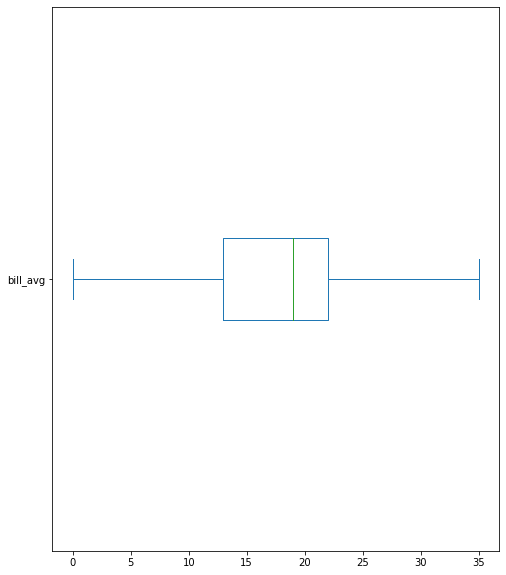

In [ ]:
df_non_outlier_02['bill_avg'].plot(kind='box',vert=False, figsize=(8,10))

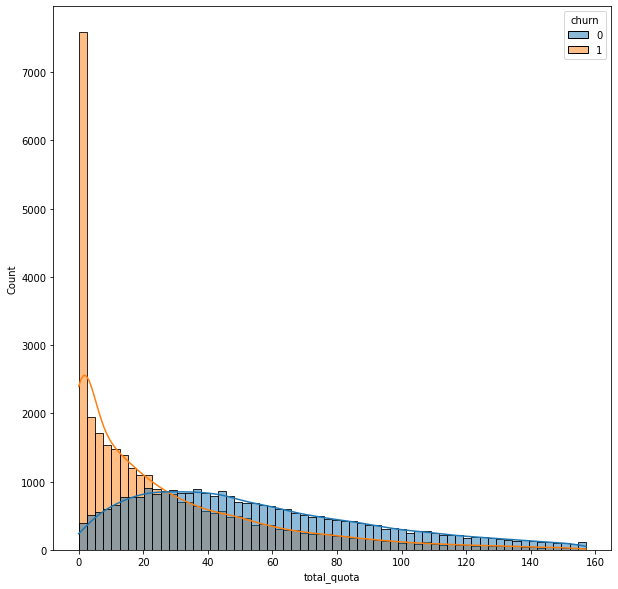

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'total_quota', hue = 'churn', data = df_non_outlier_02 ,kde=True )

## Handling Negative Values

In [ ]:
df_non_outlier_02.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_internet_subscriber
count,61110.000000,61110.000000,61110.000000,61110.000000,61110.000000,61110.000000,61110.000000,61110.000000,61110.000000,61110.000000,61110.000000,61110.000000
mean,0.885207,0.352725,2.503135,17.495549,0.525167,0.255605,37.252119,3.320483,0.196122,0.532253,40.572602,0.908738
std,0.318775,0.477822,2.049155,7.225884,0.674284,0.757853,33.911291,4.434600,0.975946,0.498963,36.707671,0.287983
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.950000,13.000000,0.000000,0.000000,9.600000,0.700000,0.000000,0.000000,10.700000,1.000000
50%,1.000000,0.000000,1.990000,19.000000,0.000000,0.000000,28.400000,2.100000,0.000000,1.000000,31.100000,1.000000
75%,1.000000,1.000000,3.420000,22.000000,1.070000,0.000000,56.300000,4.500000,0.000000,1.000000,61.300000,1.000000
max,1.000000,1.000000,12.800000,35.000000,2.920000,16.000000,153.000000,117.100000,7.000000,1.000000,157.100000,1.000000


In [ ]:
df_non_outlier_02.shape

(61110, 16)

In [ ]:
dfclean = df_non_outlier_02[df_non_outlier_02.subscription_age != -0.02]
dfclean

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,yes,no,1,Internet & Watching
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,no,no,1,Internet & Watching
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0,73.4,yes,no,1,Platinum User
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,23.3,no,no,1,Surfer Dude
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,1,11.0,no,no,1,Platinum User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8,yes,no,1,Internet & Watching
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7,yes,no,1,Internet & Watching


In [ ]:
dfclean.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_internet_subscriber
count,61109.000000,61109.000000,61109.000000,61109.000000,61109.000000,61109.000000,61109.000000,61109.000000,61109.000000,61109.000000,61109.000000,61109.000000
mean,0.885221,0.352730,2.503176,17.495835,0.525175,0.255609,37.252195,3.320516,0.196125,0.532246,40.572711,0.908737
std,0.318757,0.477824,2.049146,7.225596,0.674287,0.757859,33.911563,4.434628,0.975953,0.498963,36.707961,0.287985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.950000,13.000000,0.000000,0.000000,9.600000,0.700000,0.000000,0.000000,10.700000,1.000000
50%,1.000000,0.000000,1.990000,19.000000,0.000000,0.000000,28.400000,2.100000,0.000000,1.000000,31.100000,1.000000
75%,1.000000,1.000000,3.420000,22.000000,1.070000,0.000000,56.300000,4.500000,0.000000,1.000000,61.300000,1.000000
max,1.000000,1.000000,12.800000,35.000000,2.920000,16.000000,153.000000,117.100000,7.000000,1.000000,157.100000,1.000000


In [ ]:
dfclean.isna().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
total_quota                    0
is_on_contract                 0
is_over_limit                  0
is_internet_subscriber         0
customer_cat                   0
dtype: int64

#EDA

In [ ]:
dfeda=dfclean.copy()

## Transform Catagorical Column from 0 and 1 to No and Yes

In [ ]:
dfeda['is_tv_subscriber'] = dfeda['is_tv_subscriber'].map({1:'yes' ,0:'no'})
dfeda['is_movie_package_subscriber'] = dfeda['is_movie_package_subscriber'].map({1:'yes' ,0:'no'})
dfeda['is_internet_subscriber'] = dfeda['is_internet_subscriber'].map({1:'yes' ,0:'no'})
dfeda['churn'] = dfeda['churn'].map({1:'yes' ,0:'no'})


In [ ]:
dfeda.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
0,15,yes,no,11.95,25,0.14,0,8.4,2.3,0,no,10.7,yes,no,yes,Internet & Watching
2,23,yes,no,8.91,16,0.00,0,13.7,0.9,0,yes,14.6,no,no,yes,Internet & Watching
5,56,yes,yes,11.94,32,1.38,0,69.4,4.0,0,no,73.4,yes,no,yes,Platinum User
6,71,no,no,8.96,18,0.00,0,21.3,2.0,0,yes,23.3,no,no,yes,Surfer Dude
10,166,yes,yes,8.44,17,0.00,0,9.9,1.1,0,yes,11.0,no,no,yes,Platinum User


## Number of People Who Registered

In [ ]:
len(dfeda['id'].unique())

61109

In [ ]:
print (dfeda.groupby('churn')['id'].nunique())

churn
no     28584
yes    32525
Name: id, dtype: int64


## Number of User Who Churn

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


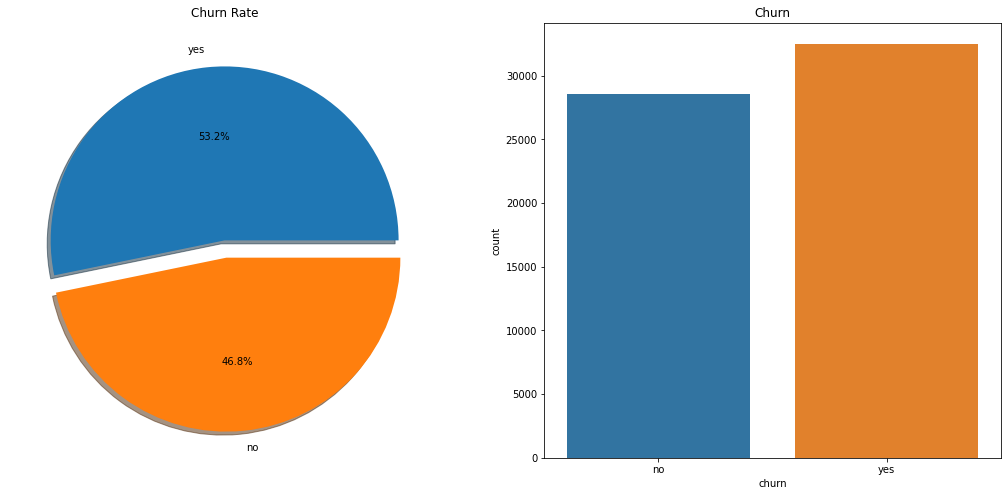

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dfeda['churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn Rate')
ax[0].set_ylabel('')
sns.countplot('churn',data=dfeda,ax=ax[1])
ax[1].set_title('Churn')
plt.show()

## Number of Tv Subscriber

In [ ]:
print (dfeda.groupby('is_tv_subscriber')['id'].nunique())

is_tv_subscriber
no      7014
yes    54095
Name: id, dtype: int64


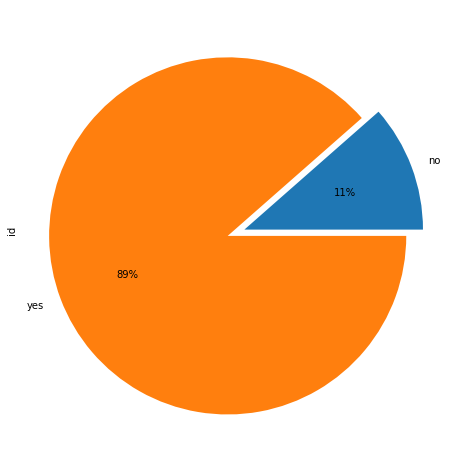

In [ ]:
dfeda.groupby('is_tv_subscriber')['id'].nunique().plot.pie(explode=[0,0.1],figsize=(8,10),autopct='%1.0f%%')
plt.show()

## Number of Movie Package Subscriber

In [ ]:
print (dfeda.groupby('is_movie_package_subscriber')['id'].nunique())

is_movie_package_subscriber
no     39554
yes    21555
Name: id, dtype: int64


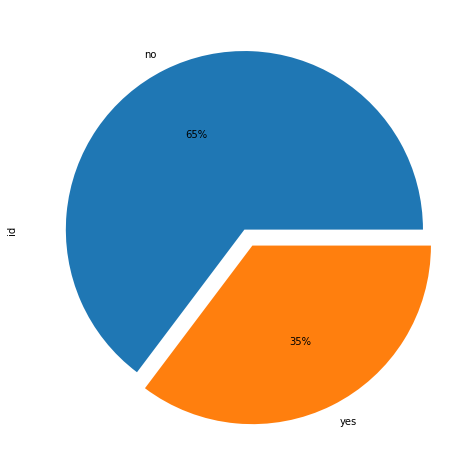

In [ ]:
dfeda.groupby('is_movie_package_subscriber')['id'].nunique().plot.pie(explode=[0,0.1],figsize=(8,10),autopct='%1.0f%%')
plt.show()

## Number of Internet Subscriber

In [ ]:
print (dfeda.groupby('is_internet_subscriber')['id'].nunique())

is_internet_subscriber
no      5577
yes    55532
Name: id, dtype: int64


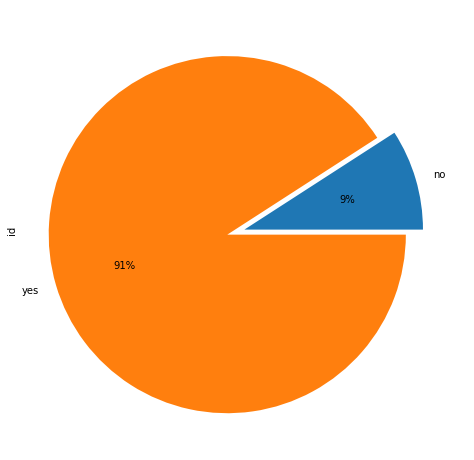

In [ ]:
dfeda.groupby('is_internet_subscriber')['id'].nunique().plot.pie(explode=[0,0.1],figsize=(8,10),autopct='%1.0f%%')
plt.show()

## Number of Customer On Contract

In [ ]:
oncontract=dfeda.groupby(['is_on_contract'])['id'].count()
oncontract

is_on_contract
no     30872
yes    30237
Name: id, dtype: int64

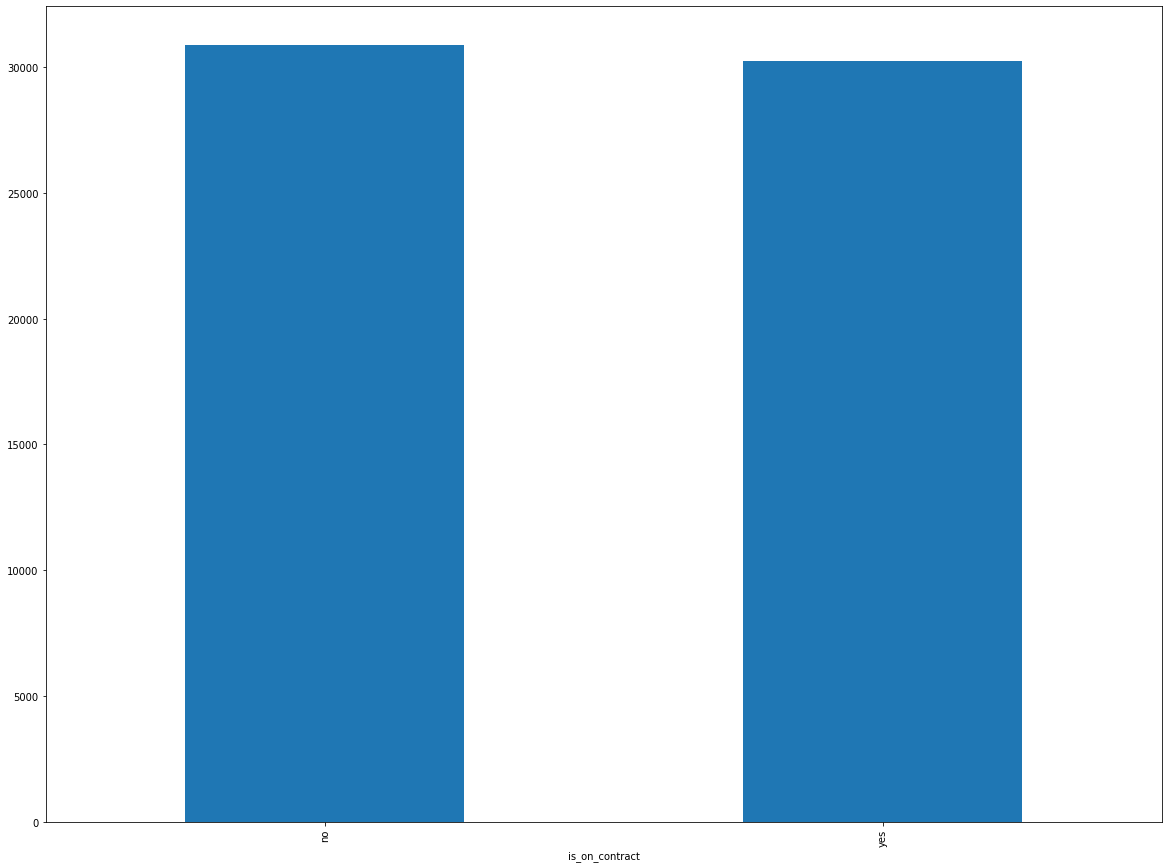

In [ ]:
oncontract.plot(kind='bar', figsize=(20,15))
plt.show()

## What Type of Subscription Customer Subscribe

In [ ]:
dfcusttype=dfeda.groupby(['customer_cat'])['id'].count().sort_values(ascending=False)
dfcusttype

customer_cat
Internet & Watching    28991
Platinum User          19529
Surfer Dude             7012
Enjoying Watching       5577
Name: id, dtype: int64

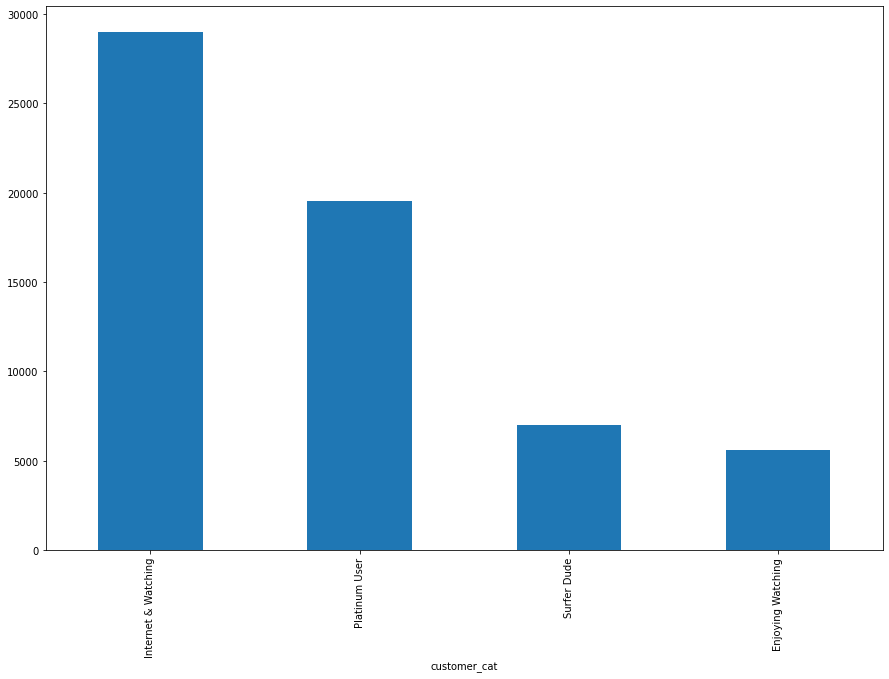

In [ ]:
dfcusttype.plot(kind='bar', figsize=(15,10))
plt.show()

## Number of Customer Subscription on Contract

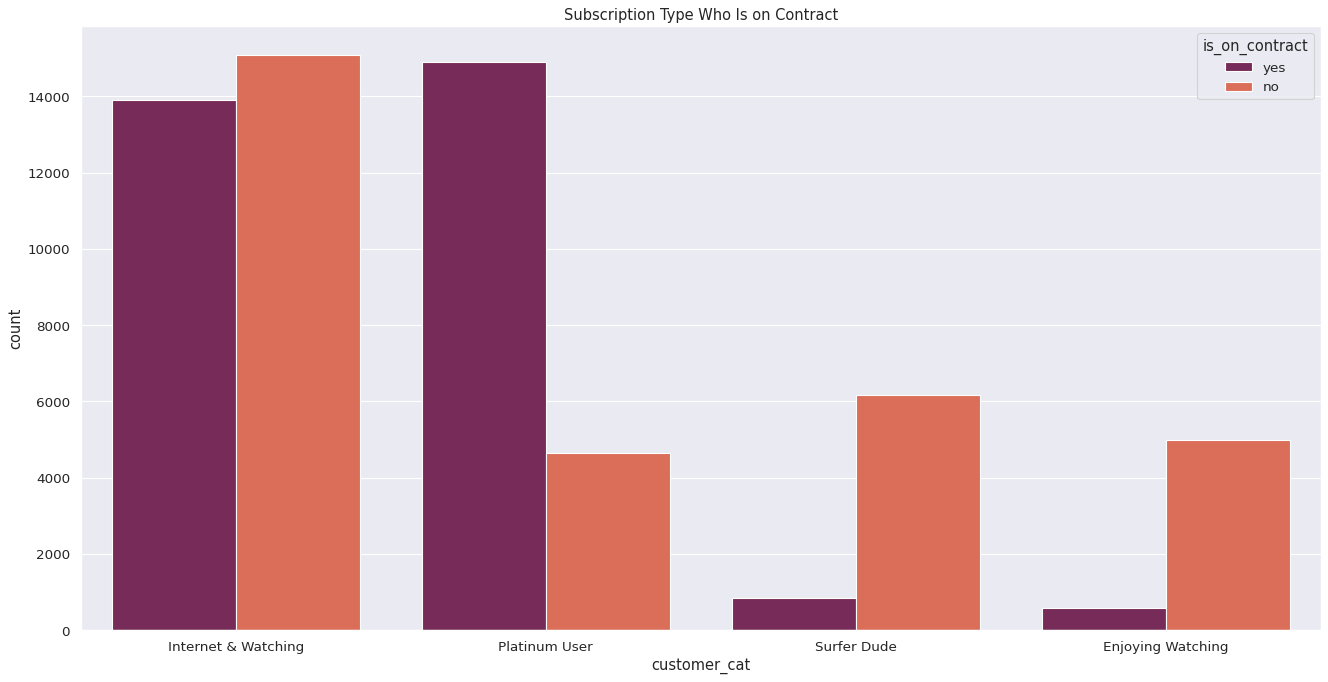

In [ ]:
plt.figure(figsize=(20,10), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=dfeda, x='customer_cat', hue='is_on_contract', palette='rocket').set_title('Subscription Type Who Is on Contract');

## Type of Subscription Who Churn

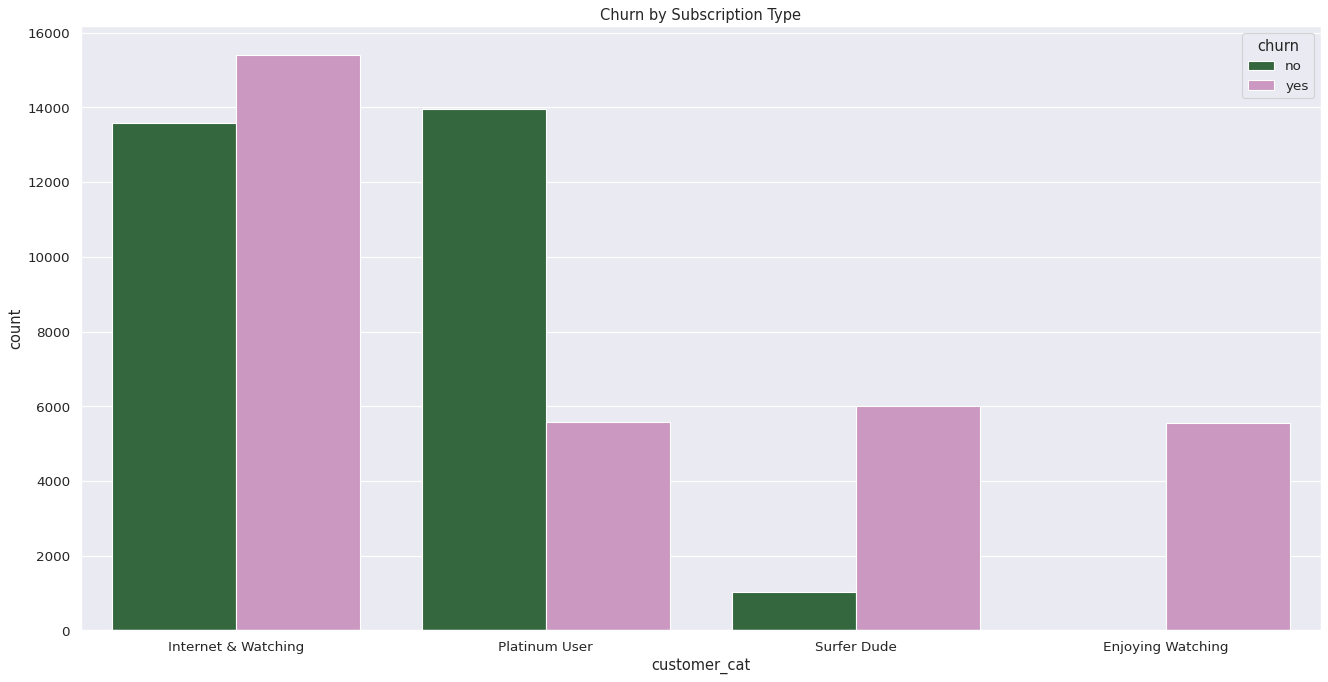

In [ ]:
plt.figure(figsize=(20,10), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=dfeda, x='customer_cat', hue='churn', palette='cubehelix').set_title('Churn by Subscription Type');


## Churn Type of Subscription

In [ ]:
churnsubs=dfeda.groupby(['customer_cat','is_on_contract','churn'])['id'].count().reset_index().sort_values('id',ascending=False)
churnsubs

,customer_cat,is_on_contract,churn,id
5,Internet & Watching,no,yes,14307
10,Platinum User,yes,no,13596
6,Internet & Watching,yes,no,12815
13,Surfer Dude,no,yes,5848
1,Enjoying Watching,no,yes,4987
9,Platinum User,no,yes,4267
11,Platinum User,yes,yes,1297
7,Internet & Watching,yes,yes,1095
4,Internet & Watching,no,no,774
14,Surfer Dude,yes,no,698


## Are Those Who not On Contract Most Likely to Churn?

As we can see those who are on contract mostlikely stay

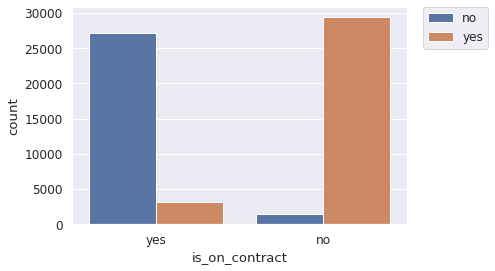

In [ ]:
sns.countplot(x='is_on_contract', hue='churn', data=dfeda)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Here we can see people who churn are mainly those who use internet and tv subscriber, people who only subscribe to internet and those who subscribe internet, tv and movie package

## Type of Subscription Who Most Likely Churn

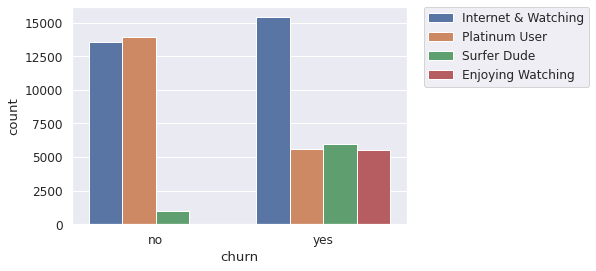

In [ ]:
sns.countplot(x='churn', hue='customer_cat', data=dfeda)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Remining Contract Who Churn

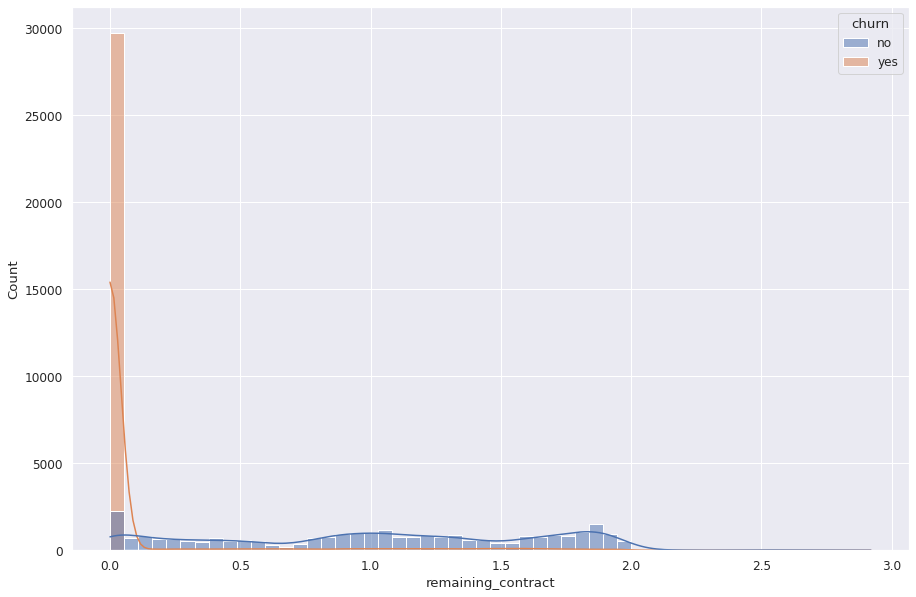

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='remaining_contract', hue = 'churn', data = dfeda,     kde=True )

People who only have less than 6 months who are most likely to churn. This possible due to price of the penalty are less than those with longer remining contract

## Subscription Age That Mostlikely to Churn

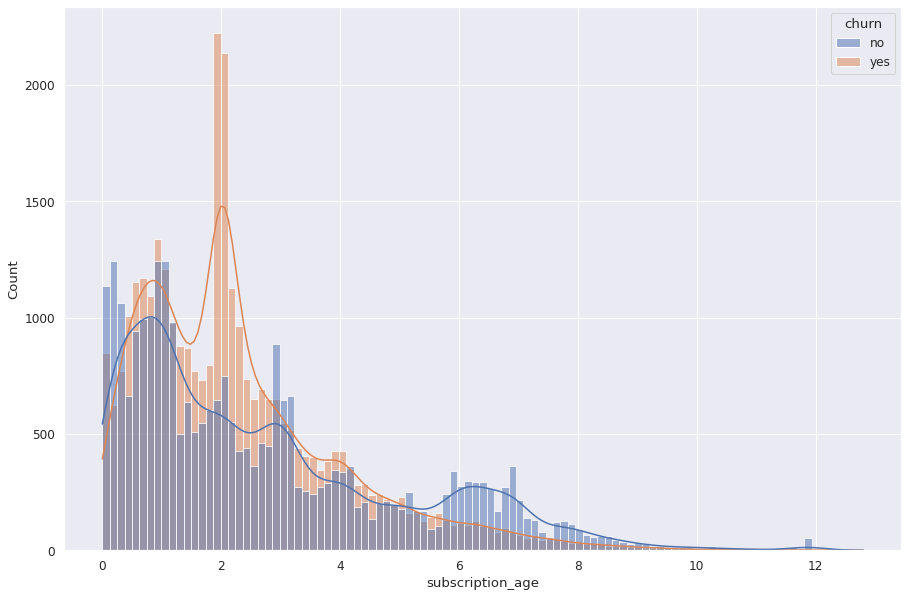

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='subscription_age', hue = 'churn', data = dfeda,     kde=True )

People who churn most subscription age is 2 Years. If We assume that this data is pulled in 2022, than 2 years subscription age relates to time when number of C-19 infection the highest thus many users probably need internet and tv subscription during lockdown

## Billing Average That Mostly People Churn

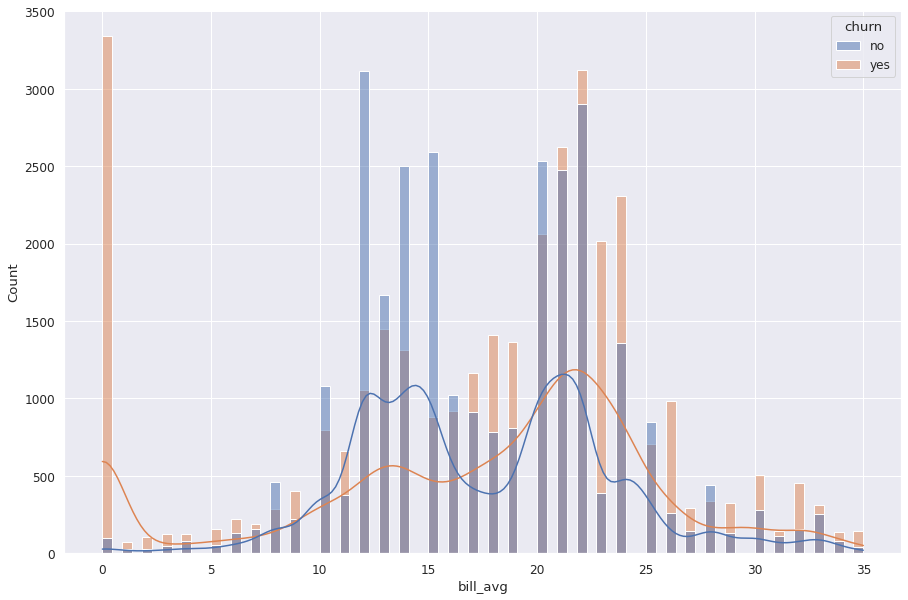

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='bill_avg', hue = 'churn', data = dfeda,     kde=True )

## Billing Average And Type of Subscription

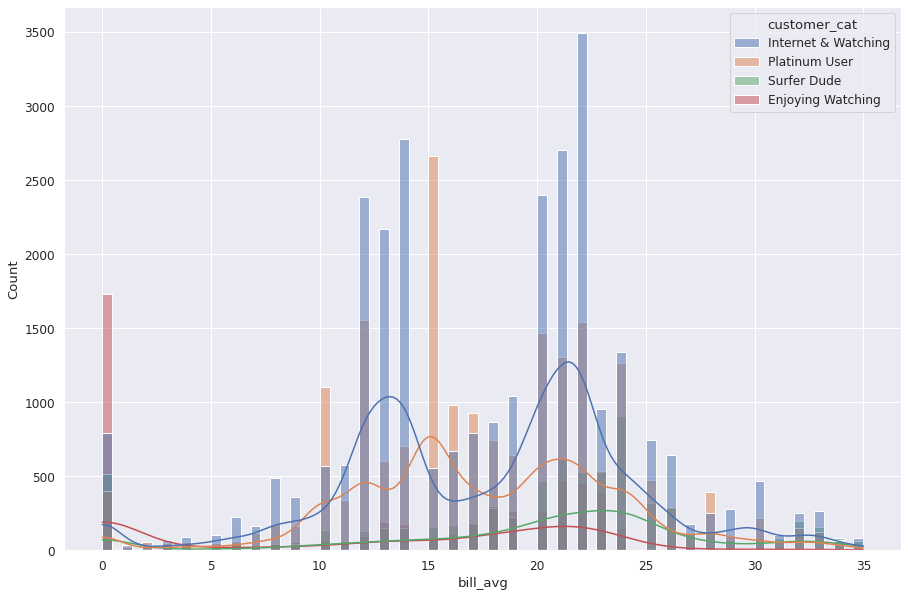

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='bill_avg', hue = 'customer_cat', data = dfeda,     kde=True )

In [ ]:
dfeda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61109 entries, 0 to 72273
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           61109 non-null  object 
 1   is_tv_subscriber             61109 non-null  object 
 2   is_movie_package_subscriber  61109 non-null  object 
 3   subscription_age             61109 non-null  float64
 4   bill_avg                     61109 non-null  int64  
 5   remaining_contract           61109 non-null  float64
 6   service_failure_count        61109 non-null  int64  
 7   download_avg                 61109 non-null  float64
 8   upload_avg                   61109 non-null  float64
 9   download_over_limit          61109 non-null  int64  
 10  churn                        61109 non-null  object 
 11  total_quota                  61109 non-null  float64
 12  is_on_contract               61109 non-null  object 
 13  is_over_limit   

## Does Service Failure Affect Churn Rate

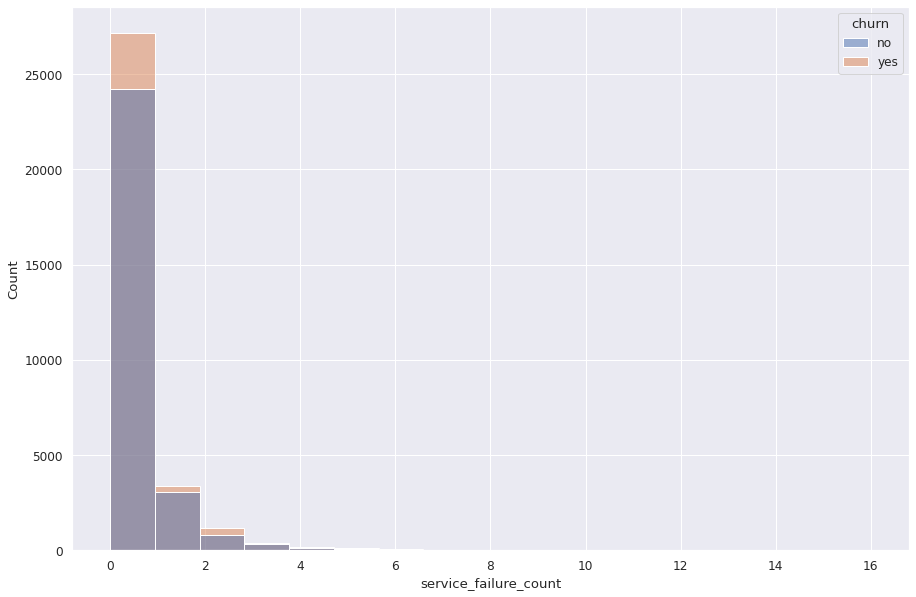

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='service_failure_count', hue = 'churn', data = dfeda,     kde=False)

## Subscription Type That Uses Most Internet Quota

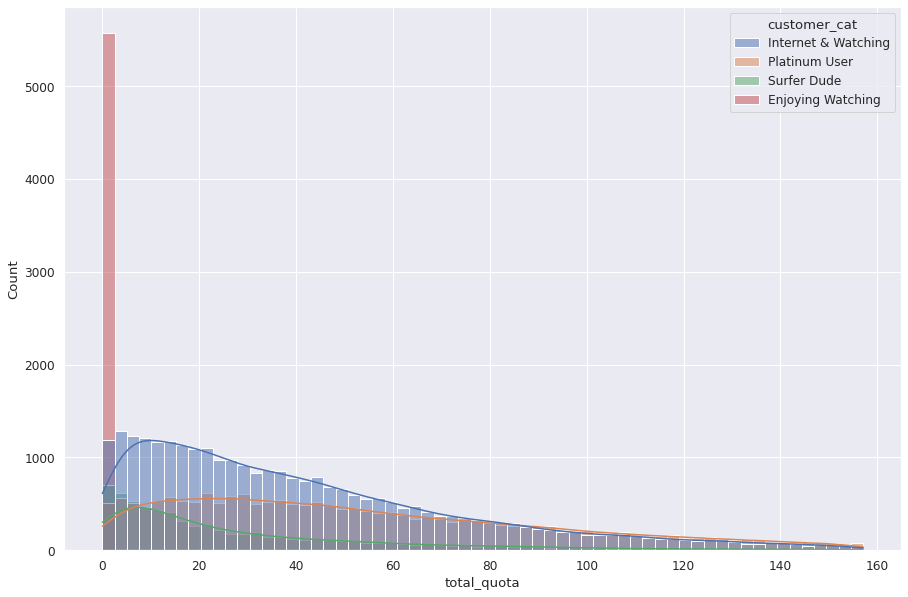

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='total_quota', hue = 'customer_cat', data = dfeda,     kde=True )

## Is on Contract Pays More Contract

In [ ]:
dfbillquota=dfeda.groupby(['customer_cat','churn','is_on_contract'])['bill_avg','total_quota'].mean().reset_index().sort_values('bill_avg', ascending=False)
dfbillquota

<ipython-input-86-23c29bae8dd3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfbillquota=dfeda.groupby(['customer_cat','churn','is_on_contract'])['bill_avg','total_quota'].mean().reset_index().sort_values('bill_avg', ascending=False)


,customer_cat,churn,is_on_contract,bill_avg,total_quota
13,Surfer Dude,no,yes,24.736390,57.868481
12,Surfer Dude,no,no,23.063091,43.153943
15,Surfer Dude,yes,yes,21.416107,49.802685
4,Internet & Watching,no,no,21.193798,48.122739
8,Platinum User,no,no,21.130081,48.493496
14,Surfer Dude,yes,no,19.246067,24.941467
6,Internet & Watching,yes,no,18.610191,32.005214
10,Platinum User,yes,no,18.198031,36.904945
9,Platinum User,no,yes,17.427626,59.200508
5,Internet & Watching,no,yes,16.958642,52.243730


In [ ]:
dfbillquota=dfeda.groupby(['customer_cat','is_on_contract','churn'])['bill_avg','subscription_age'].mean().reset_index().sort_values('bill_avg',ascending=False)
dfbillquota

<ipython-input-87-52924dad9aff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfbillquota=dfeda.groupby(['customer_cat','is_on_contract','churn'])['bill_avg','subscription_age'].mean().reset_index().sort_values('bill_avg',ascending=False)


,customer_cat,is_on_contract,churn,bill_avg,subscription_age
14,Surfer Dude,yes,no,24.736390,1.308811
12,Surfer Dude,no,no,23.063091,4.642303
15,Surfer Dude,yes,yes,21.416107,0.902953
4,Internet & Watching,no,no,21.193798,3.858928
8,Platinum User,no,no,21.130081,4.522276
13,Surfer Dude,no,yes,19.246067,2.358835
5,Internet & Watching,no,yes,18.610191,2.324725
9,Platinum User,no,yes,18.198031,2.767853
10,Platinum User,yes,no,17.427626,2.941517
6,Internet & Watching,yes,no,16.958642,2.419643


## Do People Who are on Contract and Subscrtiption Age Affect Billing Average

In [ ]:
dfbillquota=dfeda.groupby(['customer_cat','is_on_contract'])['bill_avg','subscription_age'].mean().reset_index()
dfbillquota

<ipython-input-88-22135bd0e3c3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfbillquota=dfeda.groupby(['customer_cat','is_on_contract'])['bill_avg','subscription_age'].mean().reset_index()


,customer_cat,is_on_contract,bill_avg,subscription_age
0,Enjoying Watching,no,12.308016,1.942000
1,Enjoying Watching,yes,12.744463,1.108586
2,Internet & Watching,no,18.742789,2.403465
3,Internet & Watching,yes,16.826815,2.390903
4,Platinum User,no,18.431406,2.907496
5,Platinum User,yes,17.307930,2.909276
6,Surfer Dude,no,19.442336,2.476250
7,Surfer Dude,yes,24.152302,1.237414


In [ ]:
dfeda.to_csv('isp_churn.csv',index=False)

# Let's Make New DF

## New DF Based on Who Churned

In [ ]:
dfchurn=dfeda.loc[dfeda['churn']=='yes']
dfchurn

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
2,23,yes,no,8.91,16,0.00,0,13.7,0.9,0,yes,14.6,no,no,yes,Internet & Watching
6,71,no,no,8.96,18,0.00,0,21.3,2.0,0,yes,23.3,no,no,yes,Surfer Dude
10,166,yes,yes,8.44,17,0.00,0,9.9,1.1,0,yes,11.0,no,no,yes,Platinum User
34,774,no,no,11.12,33,0.00,0,11.4,1.6,0,yes,13.0,no,no,yes,Surfer Dude
40,921,yes,no,6.35,21,0.00,0,0.0,0.0,0,yes,0.0,no,no,no,Enjoying Watching
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,yes,no,0.04,11,0.37,0,0.0,0.0,0,yes,0.0,yes,no,no,Enjoying Watching
72269,1689648,yes,yes,0.09,0,1.25,0,0.0,0.0,0,yes,0.0,yes,no,no,Enjoying Watching
72270,1689676,yes,no,0.06,1,1.63,0,0.8,0.0,0,yes,0.8,yes,no,yes,Internet & Watching
72271,1689679,yes,no,0.02,0,2.19,0,1.5,0.2,0,yes,1.7,yes,no,yes,Internet & Watching


## Distribution of Billing Average

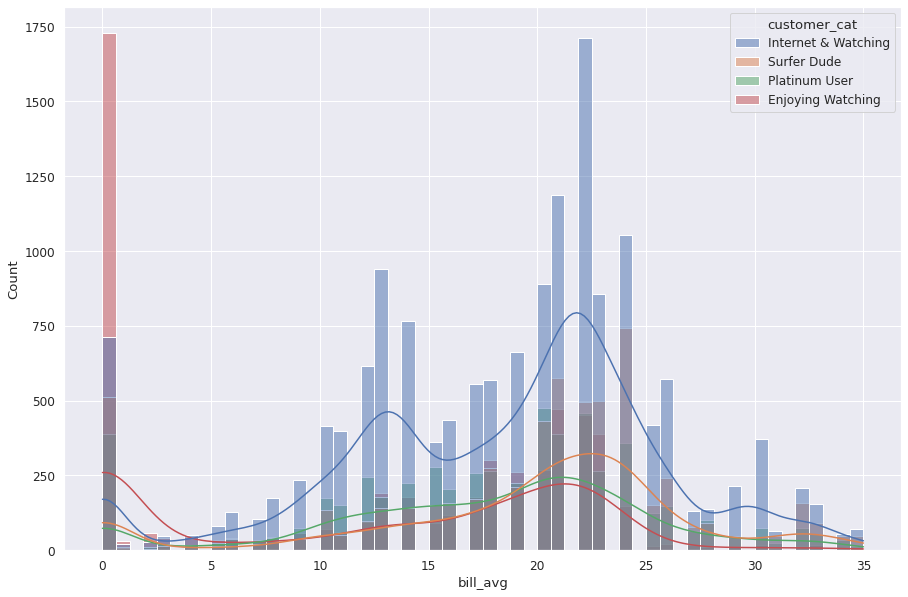

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='bill_avg', data = dfchurn, hue='customer_cat',    kde=True )

## Distribution of Total Quota

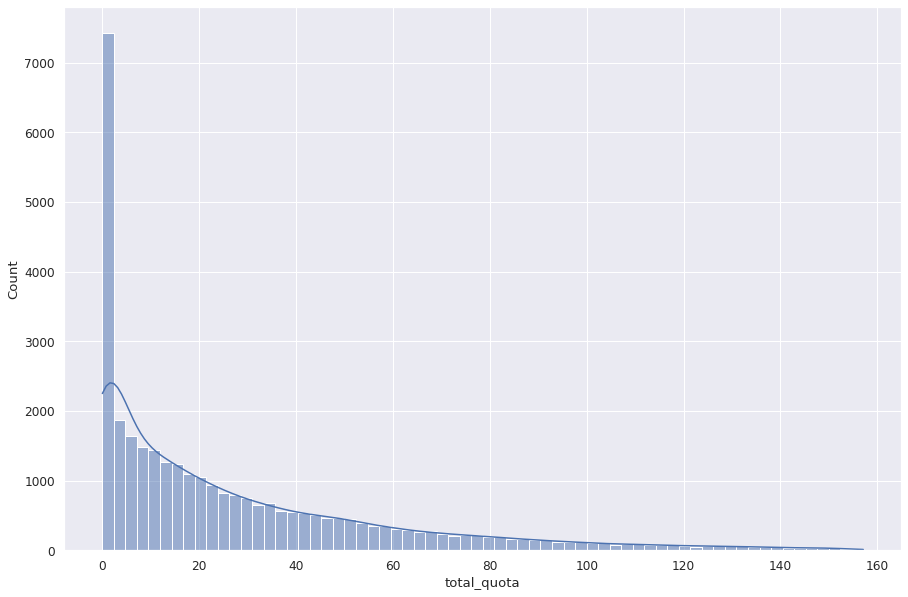

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='total_quota', data = dfchurn,     kde=True )

## What Type of Subscription People Who Churn Mostly use

In [ ]:
dfsubs=dfchurn.groupby(dfchurn['customer_cat'])['id'].count().sort_values(ascending=False)
dfsubs

customer_cat
Internet & Watching    15402
Surfer Dude             5997
Platinum User           5564
Enjoying Watching       5562
Name: id, dtype: int64

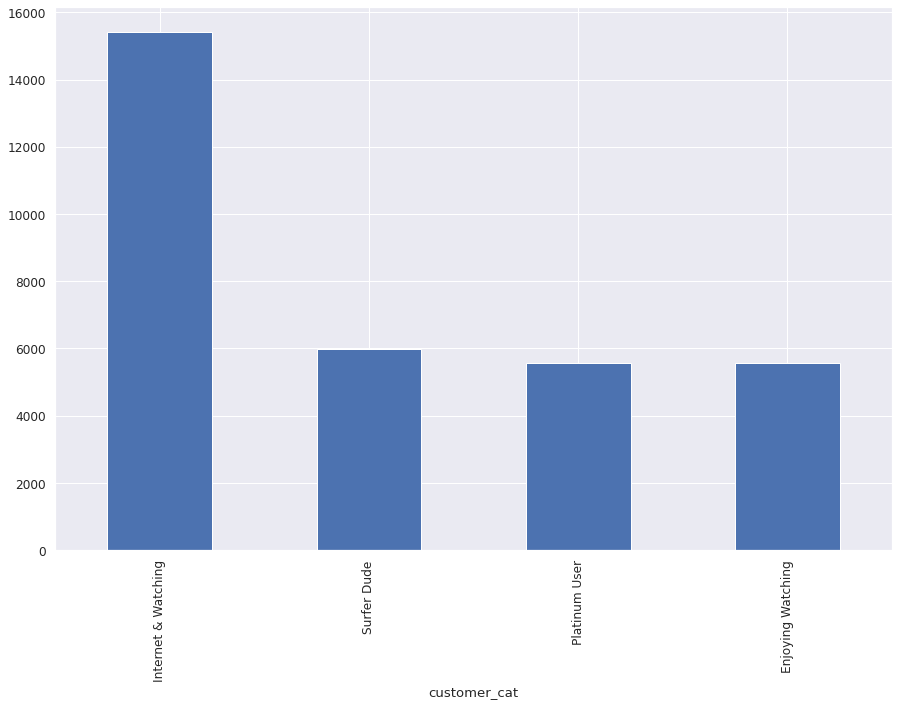

In [ ]:
dfsubs.plot.bar(figsize=(15,10))

## How Many Failure Counts It Takes for People to Churn

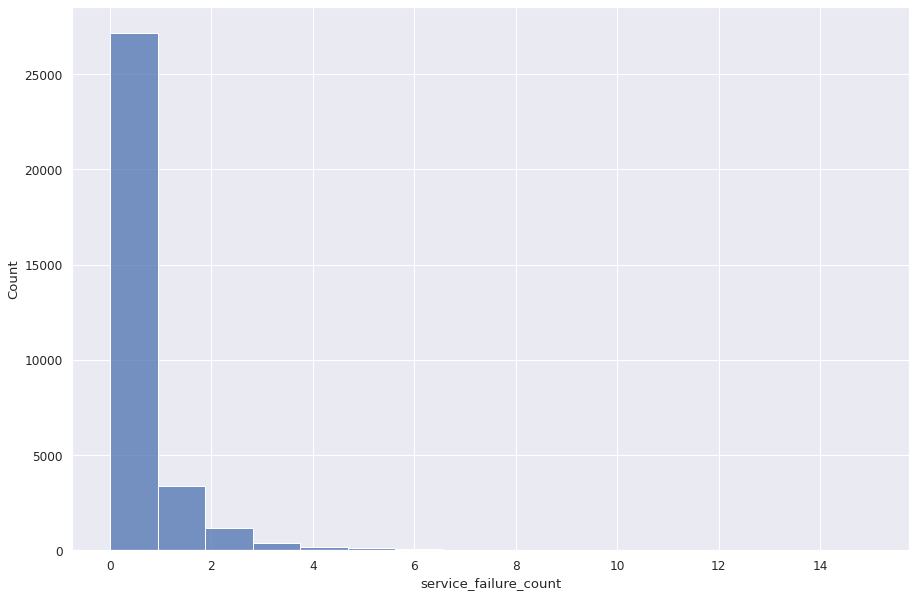

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='service_failure_count',data = dfchurn,     kde=False)

## Number Customer on Contract Who Churn

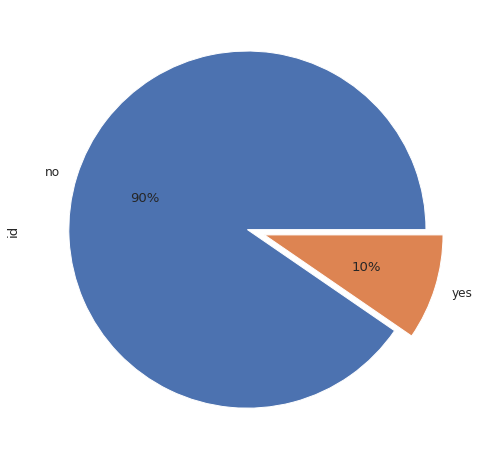

In [ ]:
dfchurn.groupby('is_on_contract')['id'].nunique().plot.pie(explode=[0,0.1],figsize=(8,10),autopct='%1.0f%%')
plt.show()

## Do People who Churn are Over Limit

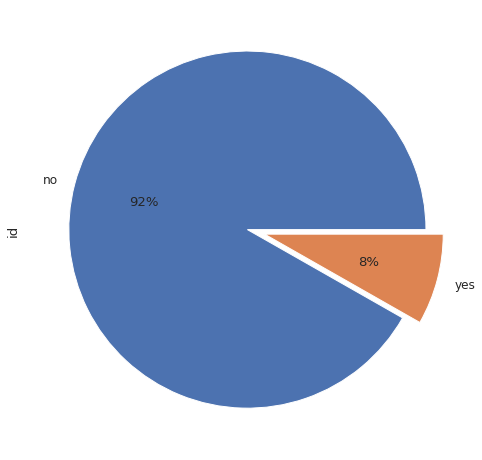

In [ ]:
dfchurn.groupby('is_over_limit')['id'].nunique().plot.pie(explode=[0,0.1],figsize=(8,10),autopct='%1.0f%%')
plt.show()

## Segmentation of People Who Churn?

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
from sklearn import preprocessing
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer


### Convert String (yes/no) to 0 and 1

In [ ]:
dfchurn2=dfchurn.copy()

In [ ]:
dfchurn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32525 entries, 2 to 72273
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           32525 non-null  object 
 1   is_tv_subscriber             32525 non-null  object 
 2   is_movie_package_subscriber  32525 non-null  object 
 3   subscription_age             32525 non-null  float64
 4   bill_avg                     32525 non-null  int64  
 5   remaining_contract           32525 non-null  float64
 6   service_failure_count        32525 non-null  int64  
 7   download_avg                 32525 non-null  float64
 8   upload_avg                   32525 non-null  float64
 9   download_over_limit          32525 non-null  int64  
 10  churn                        32525 non-null  object 
 11  total_quota                  32525 non-null  float64
 12  is_on_contract               32525 non-null  object 
 13  is_over_limit   

In [ ]:
dfchurn2['is_tv_subscriber'] = dfchurn2['is_tv_subscriber'].map({'yes':1 ,'no':0})
dfchurn2['is_movie_package_subscriber'] = dfchurn2['is_movie_package_subscriber'].map({'yes':1 ,'no':0})
dfchurn2['is_on_contract'] = dfchurn2['is_on_contract'].map({'yes':1 ,'no':0})
dfchurn2['is_over_limit'] = dfchurn2['is_over_limit'].map({'yes':1 ,'no':0})
dfchurn2['is_internet_subscriber'] = dfchurn2['is_internet_subscriber'].map({'yes':1 ,'no':0})

In [ ]:
dfchurn2

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,yes,14.6,0,0,1,Internet & Watching
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,yes,23.3,0,0,1,Surfer Dude
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,yes,11.0,0,0,1,Platinum User
34,774,0,0,11.12,33,0.00,0,11.4,1.6,0,yes,13.0,0,0,1,Surfer Dude
40,921,1,0,6.35,21,0.00,0,0.0,0.0,0,yes,0.0,0,0,0,Enjoying Watching
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,yes,0.0,1,0,0,Enjoying Watching
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,yes,0.0,1,0,0,Enjoying Watching
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,yes,0.8,1,0,1,Internet & Watching
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,yes,1.7,1,0,1,Internet & Watching


In [ ]:
dfchurn2['customer_cat'].unique()

array(['Internet & Watching', 'Surfer Dude', 'Platinum User',
       'Enjoying Watching'], dtype=object)

In [ ]:
dfchurn2['customer_cat'] = dfchurn2['customer_cat'].astype('category')
dfchurn2['customer_cat'] = dfchurn2['customer_cat'].cat.set_categories(['Internet & Watching', 'Surfer Dude', 'Platinum User', 'Tv Viewer',
       'Enjoying Watching'], ordered = True)
dfchurn2['subs'] = dfchurn2['customer_cat'].cat.codes

In [ ]:
dfchurn2

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat,subs
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,yes,14.6,0,0,1,Internet & Watching,0
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,yes,23.3,0,0,1,Surfer Dude,1
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,yes,11.0,0,0,1,Platinum User,2
34,774,0,0,11.12,33,0.00,0,11.4,1.6,0,yes,13.0,0,0,1,Surfer Dude,1
40,921,1,0,6.35,21,0.00,0,0.0,0.0,0,yes,0.0,0,0,0,Enjoying Watching,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,yes,0.0,1,0,0,Enjoying Watching,4
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,yes,0.0,1,0,0,Enjoying Watching,4
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,yes,0.8,1,0,1,Internet & Watching,0
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,yes,1.7,1,0,1,Internet & Watching,0


In [ ]:
dfchurn3=dfchurn2.drop(['id','customer_cat','churn'], axis=1)
dfchurn3

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,subs
2,1,0,8.91,16,0.00,0,13.7,0.9,0,14.6,0,0,1,0
6,0,0,8.96,18,0.00,0,21.3,2.0,0,23.3,0,0,1,1
10,1,1,8.44,17,0.00,0,9.9,1.1,0,11.0,0,0,1,2
34,0,0,11.12,33,0.00,0,11.4,1.6,0,13.0,0,0,1,1
40,1,0,6.35,21,0.00,0,0.0,0.0,0,0.0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1,0,0.04,11,0.37,0,0.0,0.0,0,0.0,1,0,0,4
72269,1,1,0.09,0,1.25,0,0.0,0.0,0,0.0,1,0,0,4
72270,1,0,0.06,1,1.63,0,0.8,0.0,0,0.8,1,0,1,0
72271,1,0,0.02,0,2.19,0,1.5,0.2,0,1.7,1,0,1,0


In [ ]:
numerical_column=['subscription_age','bill_avg',
                  'service_failure_count','download_avg',
                  'upload_avg','total_quota']

In [ ]:
dfchurn3[numerical_column] = scaler.fit_transform(dfchurn3[numerical_column])
dfchurn3

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,subs
2,1,0,3.821920,-0.168212,0.00,-0.340342,-0.398803,-0.355040,0,-0.412118,0,0,1,0
6,0,0,3.850839,0.072144,0.00,-0.340342,-0.134601,-0.089090,0,-0.135045,0,0,1,1
10,1,1,3.550081,-0.048034,0.00,-0.340342,-0.530904,-0.306685,0,-0.526768,0,0,1,2
34,0,0,5.100145,1.874809,0.00,-0.340342,-0.478759,-0.185799,0,-0.463073,0,0,1,1
40,1,0,2.341262,0.432677,0.00,-0.340342,-0.875063,-0.572635,0,-0.877089,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1,0,-1.308330,-0.769100,0.37,-0.340342,-0.875063,-0.572635,0,-0.877089,1,0,0,4
72269,1,1,-1.279411,-2.091055,1.25,-0.340342,-0.875063,-0.572635,0,-0.877089,1,0,0,4
72270,1,0,-1.296762,-1.970877,1.63,-0.340342,-0.847252,-0.572635,0,-0.851611,1,0,1,0
72271,1,0,-1.319898,-2.091055,2.19,-0.340342,-0.822917,-0.524281,0,-0.822949,1,0,1,0


1 342535.62961167144
2 263448.39399094594
3 217543.49147244057
4 171889.79092600592
5 156058.3853933399
6 142894.52084566868
7 133372.7018746187
8 124096.38600223078
9 117107.68552334514
10 110437.956179831


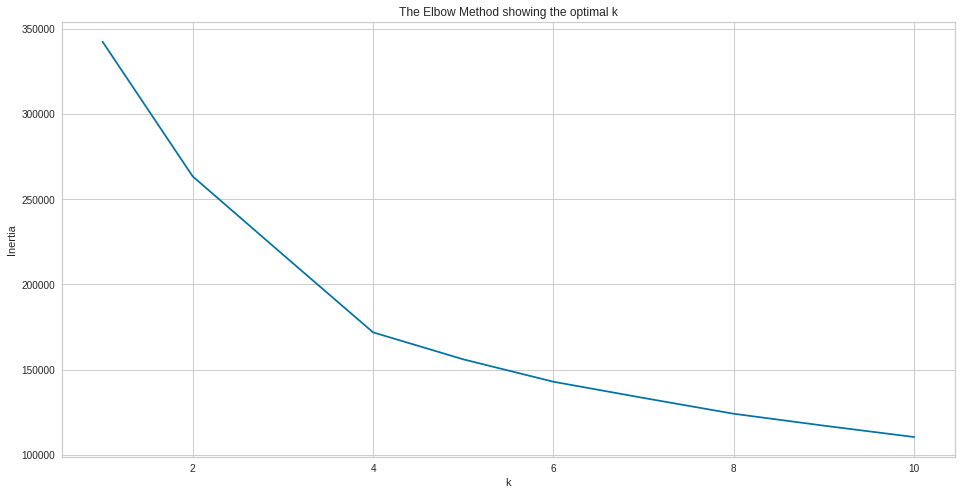

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, random_state = 9)
    kmeanModel.fit(dfchurn3)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For k=2, the average silhouette score is 0.35345460495801656
For k=3, the average silhouette score is 0.3059804100185498
For k=4, the average silhouette score is 0.336750061673281
For k=5, the average silhouette score is 0.34210754723868286
For k=6, the average silhouette score is 0.26350868219935203
For k=7, the average silhouette score is 0.2593110172227104
For k=8, the average silhouette score is 0.2633625820692583
For k=9, the average silhouette score is 0.23231186255788366


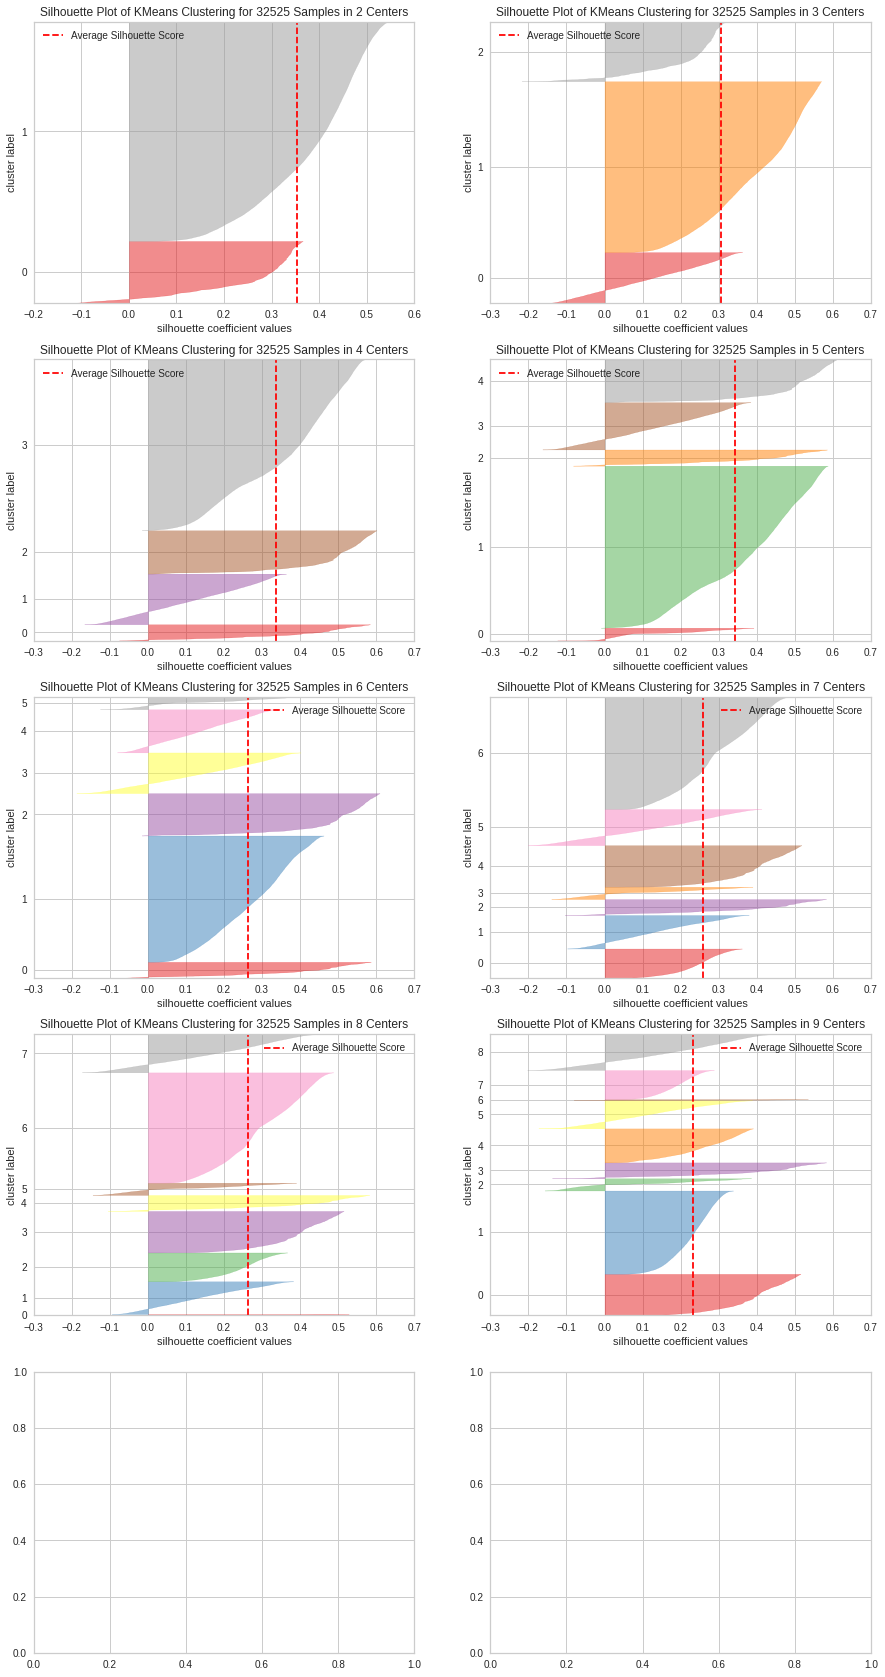

In [ ]:
K = range(2,10)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(dfchurn3)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
cluster_model = cluster.KMeans(n_clusters=5, init = 'k-means++', random_state=42)
cluster_model.fit(dfchurn3)
cluster_label = cluster_model.labels_
dfchurn2['cluster'] = cluster_label
dfchurn2

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat,subs,cluster
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,yes,14.6,0,0,1,Internet & Watching,0,2
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,yes,23.3,0,0,1,Surfer Dude,1,2
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,yes,11.0,0,0,1,Platinum User,2,2
34,774,0,0,11.12,33,0.00,0,11.4,1.6,0,yes,13.0,0,0,1,Surfer Dude,1,2
40,921,1,0,6.35,21,0.00,0,0.0,0.0,0,yes,0.0,0,0,0,Enjoying Watching,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,yes,0.0,1,0,0,Enjoying Watching,4,4
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,yes,0.0,1,0,0,Enjoying Watching,4,4
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,yes,0.8,1,0,1,Internet & Watching,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,yes,1.7,1,0,1,Internet & Watching,0,1


In [ ]:
dfchurn2.groupby('cluster')['id'].agg(['count'])

,count
cluster,
0,4999
1,15260
2,5423
3,1872
4,4971


In [ ]:
Avg = dfchurn2.groupby(['cluster'],as_index=False).mean()
Avg

,cluster,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,subs
0,0,0.848970,0.313863,2.215191,20.506101,0.191328,0.402480,79.009602,8.188978,0.018004,87.198580,0.191238,0.010002,1.000000,0.778156
1,1,0.768611,0.129685,1.563499,18.107929,0.077440,0.212123,18.768283,1.597084,0.032634,20.365367,0.076933,0.021691,1.000000,0.490760
2,2,0.764521,0.304997,4.759320,20.948737,0.071866,0.383920,23.731883,1.992421,0.041306,25.724304,0.072469,0.026554,0.997972,0.852111
3,3,0.767094,0.338675,2.736303,2.815705,0.032404,0.287927,4.508333,0.483654,5.238782,4.991987,0.051816,1.000000,0.638889,1.966346
4,4,1.000000,0.351640,1.812374,13.721988,0.065216,0.220881,0.041360,0.003319,0.087910,0.044679,0.099779,0.056528,0.019312,3.961376


In [ ]:
avg2=dfchurn2.groupby(['cluster','customer_cat'])['bill_avg','total_quota'].mean()
avg2

<ipython-input-114-b800d197648a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg2=dfchurn2.groupby(['cluster','customer_cat'])['bill_avg','total_quota'].mean()


bill_avg  total_quota
cluster customer_cat                               
0       Internet & Watching  20.326111    86.255398
        Surfer Dude          24.076923    84.570557
        Platinum User        19.096301    90.072577
        Tv Viewer                  NaN          NaN
        Enjoying Watching          NaN          NaN
1       Internet & Watching  17.757333    21.158431
        Surfer Dude          19.474370    16.967148
        Platinum User        17.397170    22.521374
        Tv Viewer                  NaN          NaN
        Enjoying Watching          NaN          NaN
2       Internet & Watching  21.442254    27.620805
        Surfer Dude          21.148003    20.732028
        Platinum User        20.097576    26.903273
        Tv Viewer                  NaN          NaN
        Enjoying Watching    14.000000     0.000000
3       Internet & Watching   4.410204     7.563469
        Surfer Dude           4.179310     7.186897
        Platinum User         3.232472     9.271587
        Tv Viewer                  NaN          NaN
        Enjoying Watching     0.615385     0.000000
4       Internet & Watching        NaN          NaN
        Surfer Dude                NaN          NaN
        Platinum User         0.656250     2.313542
        Tv Viewer                  NaN          NaN
        Enjoying Watching    13.979282     0.000000

## NEW DF Based on Who Stay


In [ ]:
dfstay=dfeda.loc[dfeda['churn']=='no']
dfstay

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
0,15,yes,no,11.95,25,0.14,0,8.4,2.3,0,no,10.7,yes,no,yes,Internet & Watching
5,56,yes,yes,11.94,32,1.38,0,69.4,4.0,0,no,73.4,yes,no,yes,Platinum User
11,174,yes,yes,11.93,10,1.28,0,10.6,0.6,0,no,11.2,yes,no,yes,Platinum User
15,288,yes,yes,11.93,18,1.80,0,1.0,0.0,0,no,1.0,yes,no,yes,Platinum User
16,291,yes,no,11.93,22,0.01,1,10.6,2.4,0,no,13.0,yes,no,yes,Internet & Watching
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71570,1673802,yes,no,0.02,0,0.15,0,2.0,0.1,0,no,2.1,yes,no,yes,Internet & Watching
71573,1673859,yes,no,0.02,0,1.05,0,4.8,0.2,0,no,5.0,yes,no,yes,Internet & Watching
71583,1674050,no,no,0.02,1,0.96,0,1.1,0.3,0,no,1.4,yes,no,yes,Surfer Dude
71586,1674100,yes,yes,0.02,1,1.95,0,0.1,0.2,0,no,0.3,yes,no,yes,Platinum User


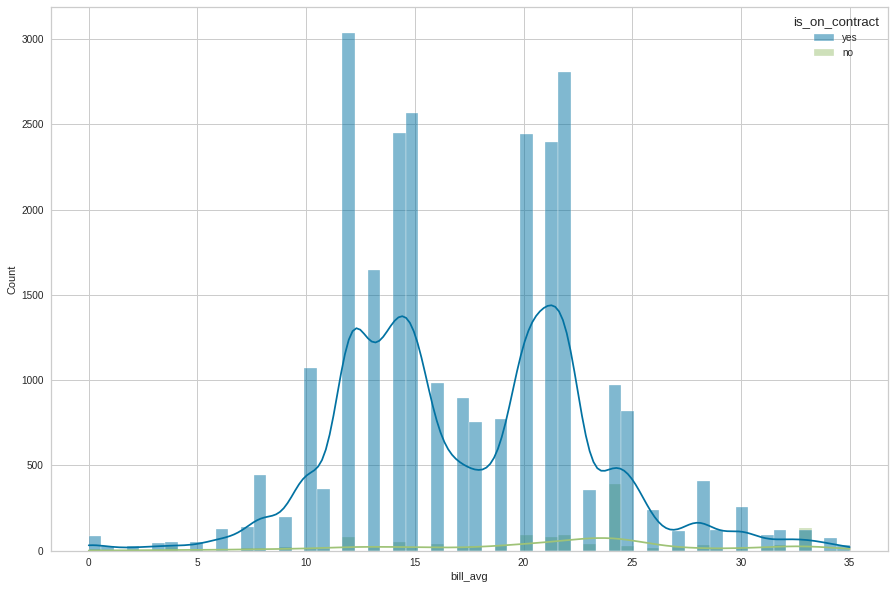

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='bill_avg', data = dfstay, hue='is_on_contract',    kde=True )

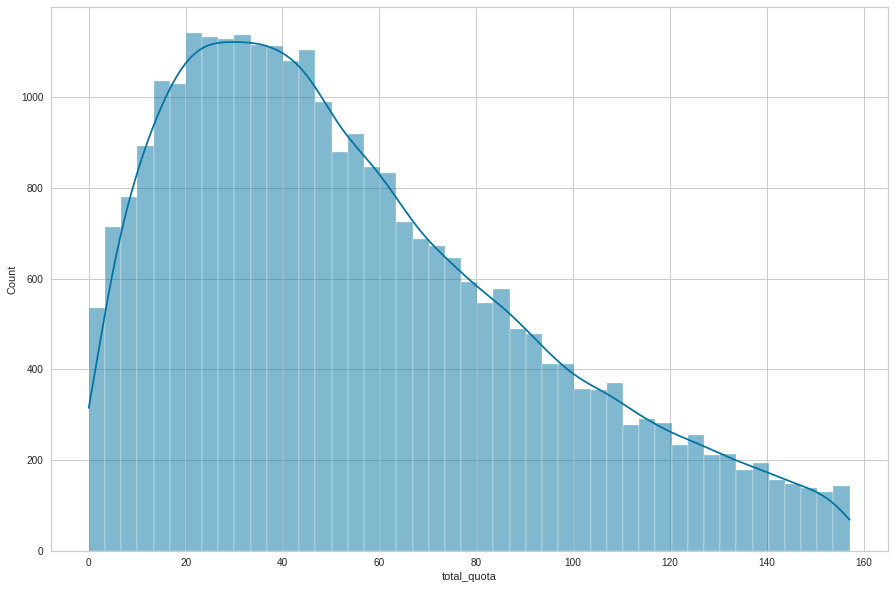

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='total_quota', data = dfstay,     kde=True )

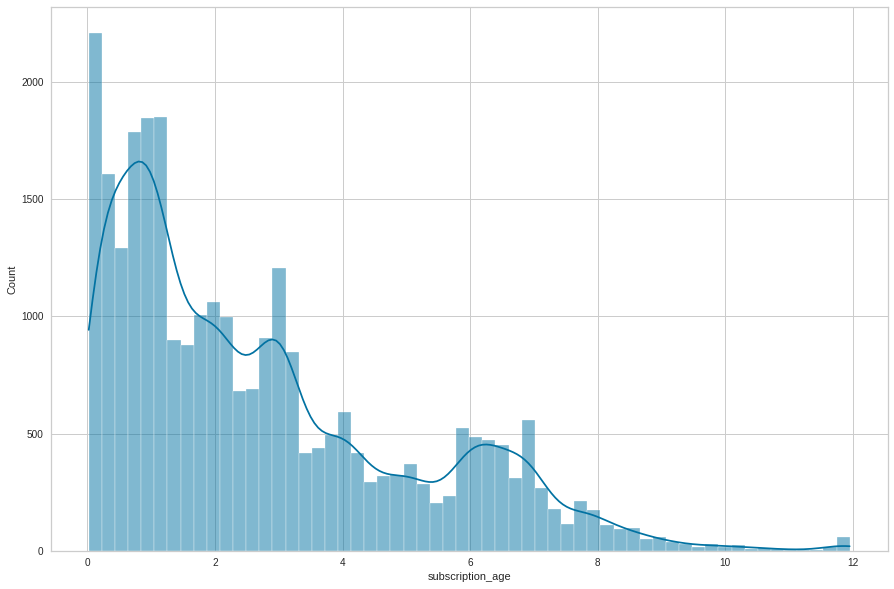

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='subscription_age', data = dfstay,     kde=True )

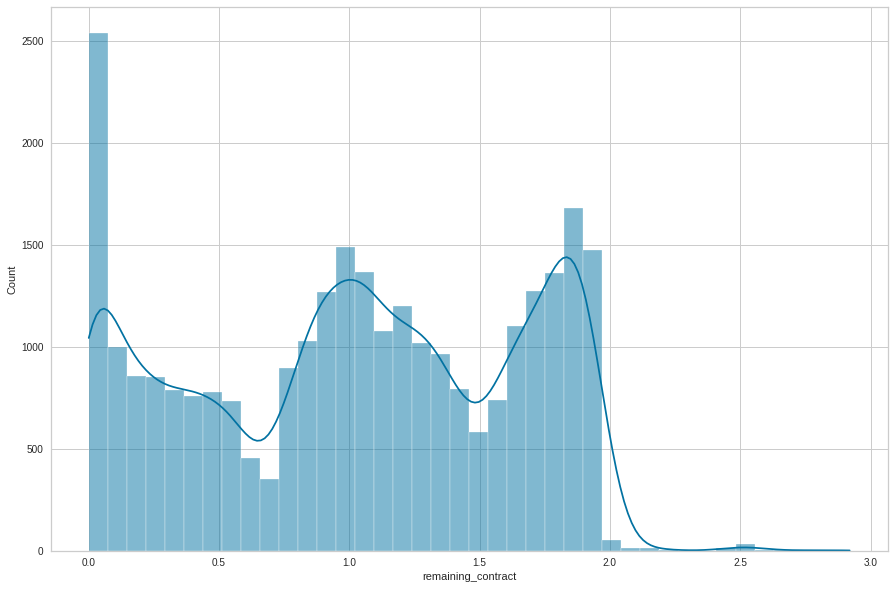

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='remaining_contract', data = dfstay,     kde=True )

In [ ]:
dfsubcus=dfstay.groupby(dfstay['customer_cat'])['id'].count().sort_values(ascending=False)
dfsubcus

customer_cat
Platinum User          13965
Internet & Watching    13589
Surfer Dude             1015
Enjoying Watching         15
Name: id, dtype: int64

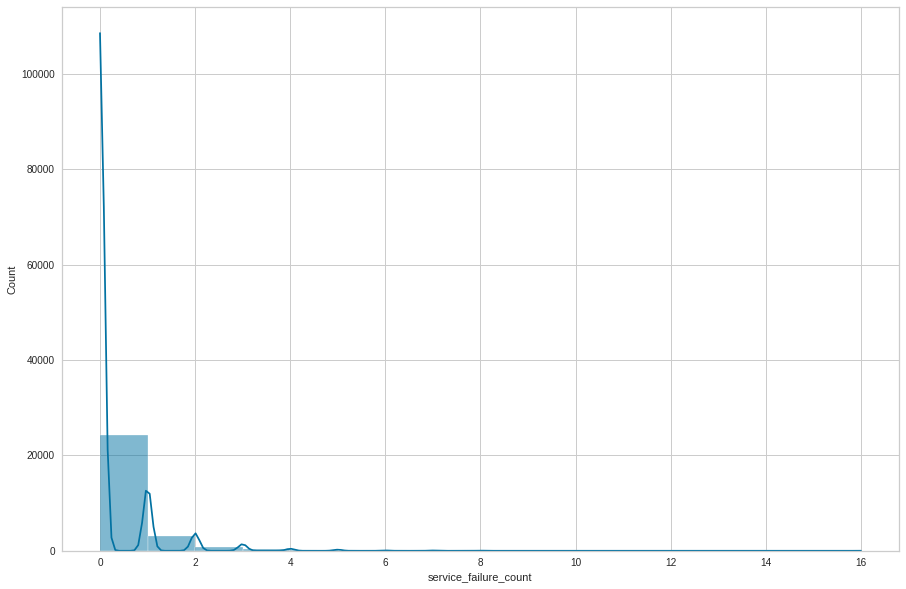

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='service_failure_count', data = dfstay,     kde=True )

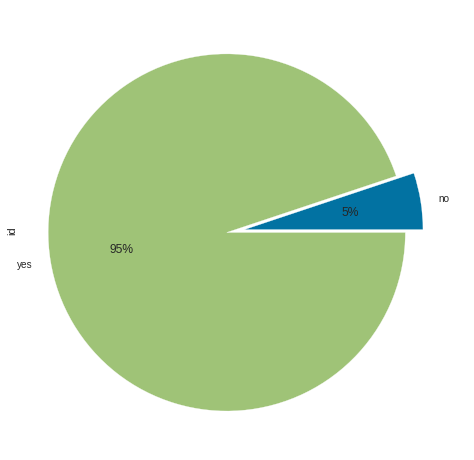

In [ ]:
dfstay.groupby('is_on_contract')['id'].nunique().plot.pie(explode=[0,0.1],figsize=(8,10),autopct='%1.0f%%')
plt.show()

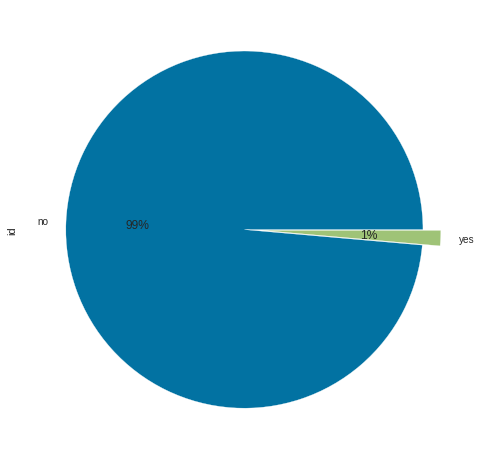

In [ ]:
dfstay.groupby('is_over_limit')['id'].nunique().plot.pie(explode=[0,0.1],figsize=(8,10),autopct='%1.0f%%')
plt.show()

# Churn Prediction

In [ ]:
dfpred=dfclean.copy()

In [ ]:
dfpred

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,yes,no,1,Internet & Watching
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,no,no,1,Internet & Watching
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0,73.4,yes,no,1,Platinum User
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,23.3,no,no,1,Surfer Dude
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,1,11.0,no,no,1,Platinum User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0,yes,no,0,Enjoying Watching
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8,yes,no,1,Internet & Watching
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7,yes,no,1,Internet & Watching


In [ ]:

dfpred['is_on_contract'] = dfpred['is_on_contract'].map({'yes':1 ,'no':0})
dfpred['is_over_limit'] = dfpred['is_over_limit'].map({'yes':1 ,'no':0})


In [ ]:
dfpred

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,1,0,1,Internet & Watching
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,0,0,1,Internet & Watching
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0,73.4,1,0,1,Platinum User
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,23.3,0,0,1,Surfer Dude
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,1,11.0,0,0,1,Platinum User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,1,0.0,1,0,0,Enjoying Watching
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0,1,0,0,Enjoying Watching
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8,1,0,1,Internet & Watching
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7,1,0,1,Internet & Watching


In [ ]:
dfpred['customer_cat'] = dfpred['customer_cat'].astype('category')
dfpred['customer_cat'] = dfpred['customer_cat'].cat.set_categories(['Internet & Watching', 'Surfer Dude', 'Platinum User', 'Tv Viewer',
       'Enjoying Watching'], ordered = True)
dfpred['subs'] = dfpred['customer_cat'].cat.codes

In [ ]:
dfpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61109 entries, 0 to 72273
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           61109 non-null  object  
 1   is_tv_subscriber             61109 non-null  int64   
 2   is_movie_package_subscriber  61109 non-null  int64   
 3   subscription_age             61109 non-null  float64 
 4   bill_avg                     61109 non-null  int64   
 5   remaining_contract           61109 non-null  float64 
 6   service_failure_count        61109 non-null  int64   
 7   download_avg                 61109 non-null  float64 
 8   upload_avg                   61109 non-null  float64 
 9   download_over_limit          61109 non-null  int64   
 10  churn                        61109 non-null  int64   
 11  total_quota                  61109 non-null  float64 
 12  is_on_contract               61109 non-null  int64   
 13  i

In [ ]:
dfpred2=dfpred.drop(['id','customer_cat'],axis=1)
dfpred2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61109 entries, 0 to 72273
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             61109 non-null  int64  
 1   is_movie_package_subscriber  61109 non-null  int64  
 2   subscription_age             61109 non-null  float64
 3   bill_avg                     61109 non-null  int64  
 4   remaining_contract           61109 non-null  float64
 5   service_failure_count        61109 non-null  int64  
 6   download_avg                 61109 non-null  float64
 7   upload_avg                   61109 non-null  float64
 8   download_over_limit          61109 non-null  int64  
 9   churn                        61109 non-null  int64  
 10  total_quota                  61109 non-null  float64
 11  is_on_contract               61109 non-null  int64  
 12  is_over_limit                61109 non-null  int64  
 13  is_internet_subs

## Heatmap

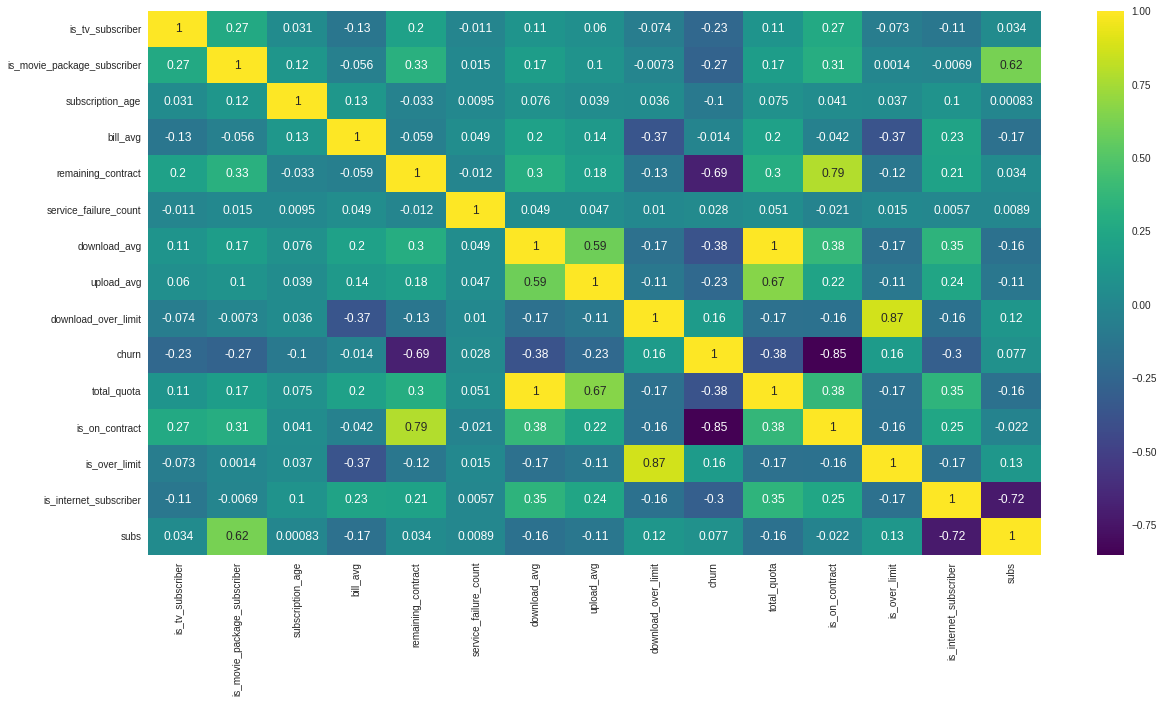

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=dfpred2.corr(), annot=True, cmap='viridis')

In [ ]:
dfpred2.drop(['download_avg','upload_avg','is_over_limit'], axis=1,inplace=True)

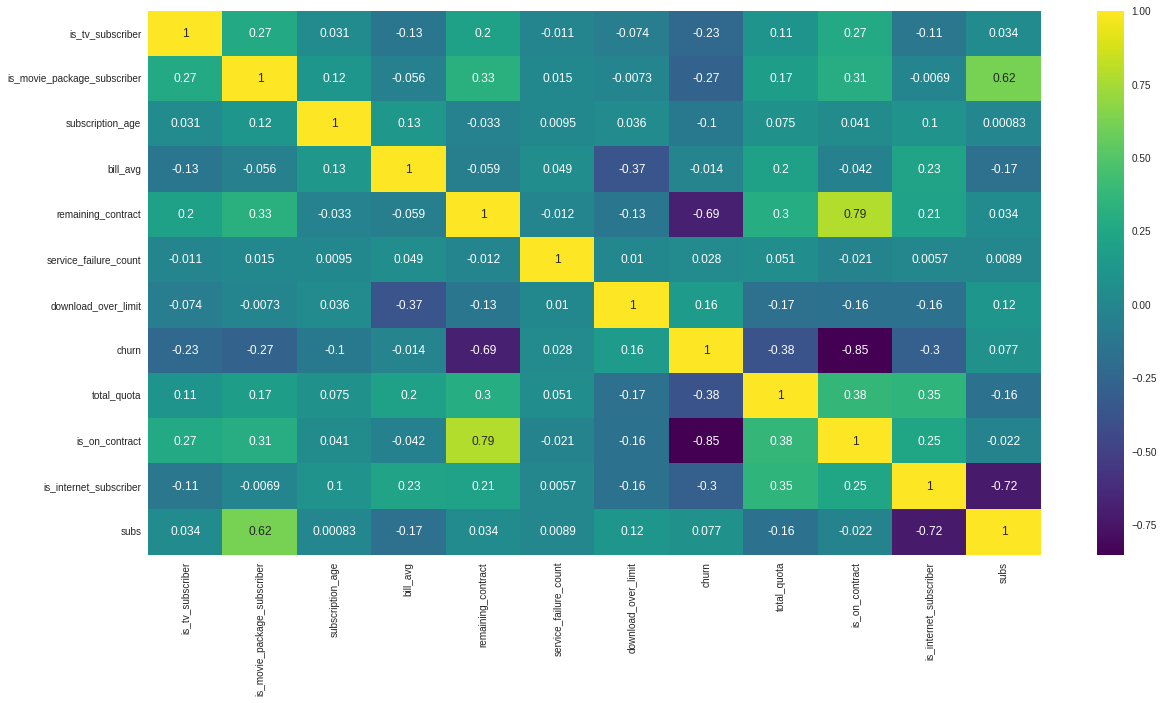

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=dfpred2.corr(), annot=True, cmap='viridis')

## Import Libraries

In [ ]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pickle

## Define the X and Y

In [ ]:
X_train =dfpred2.drop(['churn'],axis=1)
y_train =dfpred2[['churn']]

## Split the Data into Train and Test (80%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

## Logistic Regression

In [ ]:
logreg=LogisticRegression(solver='liblinear', random_state=0).fit(X_train,y_train)
pred_cv=logreg.predict(X_test)
model=accuracy_score(y_test,pred_cv)
matrix=confusion_matrix(y_test,pred_cv)
print(model)
print(matrix)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9359351988217968
[[5496  279]
 [ 504 5943]]


## KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred_cv2=knn.predict(X_test)
model2=accuracy_score(y_test,pred_cv2)
matrix2=confusion_matrix(y_test,pred_cv2)
print(model2)
print(matrix2)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8855342824414989
[[5357  418]
 [ 981 5466]]


## Naive

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_cv4=gnb.predict(X_test)
model4=accuracy_score(y_test,pred_cv4)
matrix4=confusion_matrix(y_test,pred_cv4)
print(model4)
print(matrix4)

0.9324169530355098
[[5447  328]
 [ 498 5949]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_cv5=dt.predict(X_test)
model5=accuracy_score(y_test,pred_cv5)
matrix5=confusion_matrix(y_test,pred_cv5)
print(model5)
print(matrix5)

0.9114711176566846
[[5266  509]
 [ 573 5874]]


## Random Forest

In [ ]:
rfs=RandomForestClassifier()
rfs.fit(X_train,y_train)
pred_cv6=rfs.predict(X_test)
model6=accuracy_score(y_test,pred_cv6)
matrix6=confusion_matrix(y_test,pred_cv6)
print(model6)
print(matrix6)

<ipython-input-141-09c04f5f428a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfs.fit(X_train,y_train)


0.9426444117165766
[[5519  256]
 [ 445 6002]]


In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN','Naive Bayes', 'Decision Tree','Forest Random'],
    'Score': [model,model2,model4,model5,model6]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)

,Model
Score,
0.942644,Forest Random
0.935935,Logistic Regression
0.932417,Naive Bayes
0.911471,Decision Tree
0.885534,KNN


## Testing

In [ ]:
dftest=dfpred.copy()
dftest

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,customer_cat,subs
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,1,0,1,Internet & Watching,0
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,0,0,1,Internet & Watching,0
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0,73.4,1,0,1,Platinum User,2
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,23.3,0,0,1,Surfer Dude,1
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,1,11.0,0,0,1,Platinum User,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,1,0.0,1,0,0,Enjoying Watching,4
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0,1,0,0,Enjoying Watching,4
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8,1,0,1,Internet & Watching,0
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7,1,0,1,Internet & Watching,0


## Droping Customer_Cat

In [ ]:
dftest2=dftest.drop(['customer_cat'], axis=1)
dftest2

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,total_quota,is_on_contract,is_over_limit,is_internet_subscriber,subs
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0,10.7,1,0,1,0
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1,14.6,0,0,1,0
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0,73.4,1,0,1,2
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1,23.3,0,0,1,1
10,166,1,1,8.44,17,0.00,0,9.9,1.1,0,1,11.0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0.0,0.0,0,1,0.0,1,0,0,4
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1,0.0,1,0,0,4
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1,0.8,1,0,1,0
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1,1.7,1,0,1,0


## Drop is Over Limit, Download Average, Upload Average

In [ ]:
dftest2a=dftest2.drop(['is_over_limit', 'download_avg','upload_avg'],axis=1)
dftest2a

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_over_limit,churn,total_quota,is_on_contract,is_internet_subscriber,subs
0,15,1,0,11.95,25,0.14,0,0,0,10.7,1,1,0
2,23,1,0,8.91,16,0.00,0,0,1,14.6,0,1,0
5,56,1,1,11.94,32,1.38,0,0,0,73.4,1,1,2
6,71,0,0,8.96,18,0.00,0,0,1,23.3,0,1,1
10,166,1,1,8.44,17,0.00,0,0,1,11.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0,1,0.0,1,0,4
72269,1689648,1,1,0.09,0,1.25,0,0,1,0.0,1,0,4
72270,1689676,1,0,0.06,1,1.63,0,0,1,0.8,1,1,0
72271,1689679,1,0,0.02,0,2.19,0,0,1,1.7,1,1,0


### Make is on contract all to yes

In [ ]:
dftest2a['is_on_contract']=dftest2a['is_on_contract'].replace([0], 1)
dftest2a

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_over_limit,churn,total_quota,is_on_contract,is_internet_subscriber,subs
0,15,1,0,11.95,25,0.14,0,0,0,10.7,1,1,0
2,23,1,0,8.91,16,0.00,0,0,1,14.6,1,1,0
5,56,1,1,11.94,32,1.38,0,0,0,73.4,1,1,2
6,71,0,0,8.96,18,0.00,0,0,1,23.3,1,1,1
10,166,1,1,8.44,17,0.00,0,0,1,11.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0,1,0.0,1,0,4
72269,1689648,1,1,0.09,0,1.25,0,0,1,0.0,1,0,4
72270,1689676,1,0,0.06,1,1.63,0,0,1,0.8,1,1,0
72271,1689679,1,0,0.02,0,2.19,0,0,1,1.7,1,1,0


## Drop Churn

In [ ]:
dftest3=dftest2a.drop(['churn'], axis=1)
dftest3

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_over_limit,total_quota,is_on_contract,is_internet_subscriber,subs
0,15,1,0,11.95,25,0.14,0,0,10.7,1,1,0
2,23,1,0,8.91,16,0.00,0,0,14.6,1,1,0
5,56,1,1,11.94,32,1.38,0,0,73.4,1,1,2
6,71,0,0,8.96,18,0.00,0,0,23.3,1,1,1
10,166,1,1,8.44,17,0.00,0,0,11.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0,0.0,1,0,4
72269,1689648,1,1,0.09,0,1.25,0,0,0.0,1,0,4
72270,1689676,1,0,0.06,1,1.63,0,0,0.8,1,1,0
72271,1689679,1,0,0.02,0,2.19,0,0,1.7,1,1,0


## Drop User Id but Store it First

In [ ]:
userid=dftest3['id']

In [ ]:
dftest3a=dftest3.drop(['id'], axis=1)
dftest3a

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_over_limit,total_quota,is_on_contract,is_internet_subscriber,subs
0,1,0,11.95,25,0.14,0,0,10.7,1,1,0
2,1,0,8.91,16,0.00,0,0,14.6,1,1,0
5,1,1,11.94,32,1.38,0,0,73.4,1,1,2
6,0,0,8.96,18,0.00,0,0,23.3,1,1,1
10,1,1,8.44,17,0.00,0,0,11.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
72268,1,0,0.04,11,0.37,0,0,0.0,1,0,4
72269,1,1,0.09,0,1.25,0,0,0.0,1,0,4
72270,1,0,0.06,1,1.63,0,0,0.8,1,1,0
72271,1,0,0.02,0,2.19,0,0,1.7,1,1,0


In [ ]:
dftest3a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61109 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             61109 non-null  int64  
 1   is_movie_package_subscriber  61109 non-null  int64  
 2   subscription_age             61109 non-null  float64
 3   bill_avg                     61109 non-null  int64  
 4   remaining_contract           61109 non-null  float64
 5   service_failure_count        61109 non-null  int64  
 6   download_over_limit          61109 non-null  int64  
 7   total_quota                  61109 non-null  float64
 8   is_on_contract               61109 non-null  int64  
 9   is_internet_subscriber       61109 non-null  int64  
 10  subs                         61109 non-null  int8   
dtypes: float64(3), int64(7), int8(1)
memory usage: 7.2 MB


## Predict The Churn Rate if Every User is On Contract

In [ ]:
dftest3a['churn']=rfs.predict(dftest3a)
dftest3a

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_over_limit,total_quota,is_on_contract,is_internet_subscriber,subs,churn
0,1,0,11.95,25,0.14,0,0,10.7,1,1,0,0
2,1,0,8.91,16,0.00,0,0,14.6,1,1,0,1
5,1,1,11.94,32,1.38,0,0,73.4,1,1,2,0
6,0,0,8.96,18,0.00,0,0,23.3,1,1,1,1
10,1,1,8.44,17,0.00,0,0,11.0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1,0,0.04,11,0.37,0,0,0.0,1,0,4,1
72269,1,1,0.09,0,1.25,0,0,0.0,1,0,4,1
72270,1,0,0.06,1,1.63,0,0,0.8,1,1,0,1
72271,1,0,0.02,0,2.19,0,0,1.7,1,1,0,1


## Embed ID Back to Dataframe

In [ ]:
dftest3a.insert(loc=0, column = 'id', value=userid)
dftest3a

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_over_limit,total_quota,is_on_contract,is_internet_subscriber,subs,churn
0,15,1,0,11.95,25,0.14,0,0,10.7,1,1,0,0
2,23,1,0,8.91,16,0.00,0,0,14.6,1,1,0,1
5,56,1,1,11.94,32,1.38,0,0,73.4,1,1,2,0
6,71,0,0,8.96,18,0.00,0,0,23.3,1,1,1,1
10,166,1,1,8.44,17,0.00,0,0,11.0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0,0.0,1,0,4,1
72269,1689648,1,1,0.09,0,1.25,0,0,0.0,1,0,4,1
72270,1689676,1,0,0.06,1,1.63,0,0,0.8,1,1,0,1
72271,1689679,1,0,0.02,0,2.19,0,0,1.7,1,1,0,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


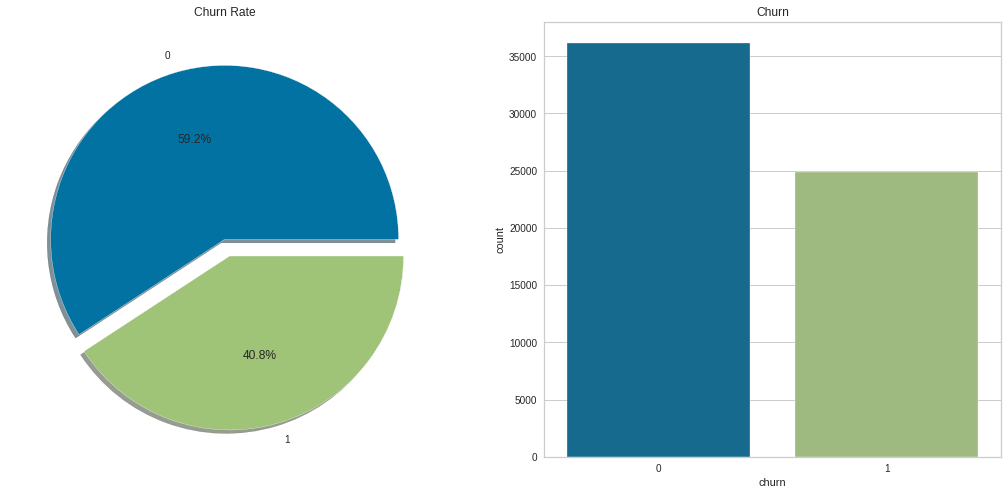

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dftest3a['churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn Rate')
ax[0].set_ylabel('')
sns.countplot('churn',data=dftest3a,ax=ax[1])
ax[1].set_title('Churn')
plt.show()

In [ ]:
print (dftest3a.groupby('churn')['id'].nunique())

churn
0    36188
1    24921
Name: id, dtype: int64


In [ ]:
dftest4=dftest3a.drop(['is_on_contract'],axis=1)
dftest4

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_over_limit,total_quota,is_internet_subscriber,subs,churn
0,15,1,0,11.95,25,0.14,0,0,10.7,1,0,0
2,23,1,0,8.91,16,0.00,0,0,14.6,1,0,1
5,56,1,1,11.94,32,1.38,0,0,73.4,1,2,0
6,71,0,0,8.96,18,0.00,0,0,23.3,1,1,1
10,166,1,1,8.44,17,0.00,0,0,11.0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
72268,1689642,1,0,0.04,11,0.37,0,0,0.0,0,4,1
72269,1689648,1,1,0.09,0,1.25,0,0,0.0,0,4,1
72270,1689676,1,0,0.06,1,1.63,0,0,0.8,1,0,1
72271,1689679,1,0,0.02,0,2.19,0,0,1.7,1,0,1


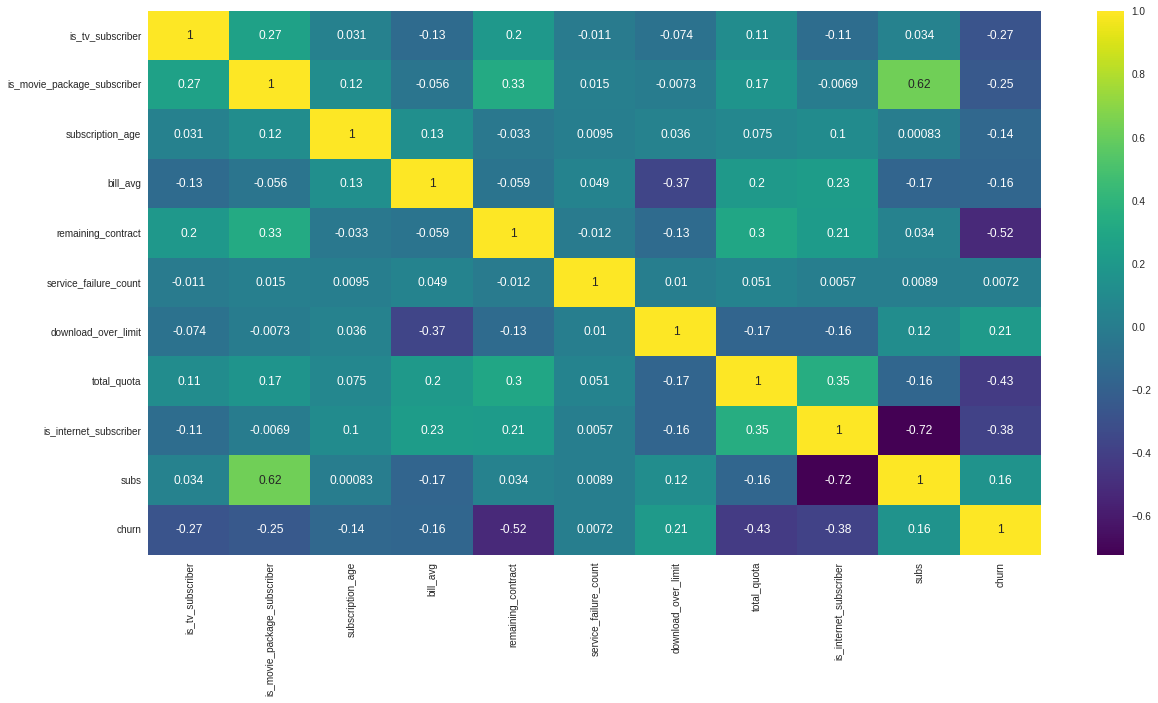

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=dftest4.corr(), annot=True, cmap='viridis')

In [ ]:
dfavg=dftest4.groupby(['churn','subs'])['bill_avg','subscription_age','remaining_contract','total_quota'].mean()
dfavg

<ipython-input-157-131167cf2350>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfavg=dftest4.groupby(['churn','subs'])['bill_avg','subscription_age','remaining_contract','total_quota'].mean()


bill_avg  subscription_age  remaining_contract  total_quota
churn subs                                                              
0     0     18.212618          2.548025            0.671564    49.653742
      1     25.322373          2.647170            0.582321    58.927917
      2     18.092845          2.980801            1.003238    57.379221
      4     13.857143          3.392857            1.424286     0.000000
1     0     17.158318          2.140017            0.075323    28.792336
      1     18.502838          2.235563            0.029888    21.232943
      2     14.920376          2.540345            0.364147    37.051348
      4     12.352065          1.852346            0.067050     0.000000